# Wine Quality dataset

Generally, we measure wine quality after we taste it. But if it possible to measure the quality of wine from chemical test like alcohol, pH in wine. So we decide to create model that can predict the wine quality from the provided attribute.


### Group member
- Jiranon	Singhamart		60070503409
- Natthawat	Tungruethaipak	60070503426
- Nathaphop	Sundarabhogin	60070503420

This project is a part of CPE452 Data Mining of King Mongkut's University of Technology Thonburi.

### Source of dataset
https://archive.ics.uci.edu/ml/datasets/wine+quality

### Description of Dataset
From source, this dataset consists of 2 files, which are `wine-quality-red.csv` and `winequality-white.csv`.

- 12 columns
    - fixed acidity
    - volatile acidity
    - citric acid
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - density
    - pH
    - sulphates
    - alcohol
    - quality (Output)
- `wine-quality-red.csv` has 1599 rows and `winequality-white.csv` has 4898 nrows. 

### Load dataset

In [1]:
import numpy as np
import pandas as pd
red_wine = pd.read_csv("winequality-red.csv",sep=';')
white_wine = pd.read_csv("winequality-white.csv",sep=';')

### Example of data

In [2]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Number of row and column

In [4]:
red_wine.shape

(1599, 12)

In [5]:
white_wine.shape

(4898, 12)

From **Example of data** and **Number of row and column**, the dataset has rows and columns follow the description from source.

# Preprocess

## Data Cleaning

### Check NULL

In [6]:
red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
white_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

This dataset does not have any null in any column. So, we don't need to handle with null value in dataset.

### Check Noisy Value

In [8]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

Both wines does not have any noisy value or missing value. As you can see from above, min and max of every column doesn't have like negative value or unusual value in common attribute e.g. pH. So, we don't have to handle with noisy value.

## Data Integration

### Merge 2 Tables Together

Create a new column to specify the type of wine and then join 2 tables together. We could use this tables in EDA part just prepare for it. 

In [10]:
white_wine['type'] = 'white'
red_wine['type'] = 'red'
wine=pd.concat([white_wine,red_wine])
white_wine = white_wine.drop(columns = 'type')
red_wine = red_wine.drop(columns = 'type')
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   type  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
1594     10.5        5    red  
1595     11.2        6    red  
1596     11.0        6    red  
1597     10.2        5    red  
1598     11.0        6    red  

[6497 rows x 13 columns]

## Data Transformation

### Discretization

#### Quality

In [11]:
pd.crosstab(index=wine['quality'],
           columns=wine['type'])

type     red  white
quality            
3         10     20
4         53    163
5        681   1457
6        638   2198
7        199    880
8         18    175
9          0      5

Normally, the quality of wine started from 0 to 10. But in dataset, red wine has 3-8 qualities and white wine has 3-9 qualities. Also, the data is quiet imbalance class. After asked with Aj.Naruemon. So, we change output from 0-10 to binary output which are good quality(1) if quality is more than 6 or otherwise, not good quality(0). And we will create model with 3 outputs to compare which bin quality to 3-4, 5-6 and 7-9. The last bin is 7-9 because it has only 5 rows.

##### Change quality to good quality or not good quality

In [12]:
red_wine['quality_type']=red_wine['quality'].apply(lambda x: 'good quality' if x>=7 else 'not good quality')
white_wine['quality_type']=white_wine['quality'].apply(lambda x: 'good quality' if x>=7 else 'not good quality')
wine['quality_type']=wine['quality'].apply(lambda x: 'good quality' if x>=7 else 'not good quality')

##### Bin quality to 3 bins

In [13]:
red_wine['quality_3_bin']=red_wine['quality'].apply(lambda x: '7-9' if x>=7 else ('5-6' if x >= 5 and x < 7 else '3-4'))
white_wine['quality_3_bin']=white_wine['quality'].apply(lambda x: '7-9' if x>=7 else ('5-6' if x >= 5 and x < 7 else '3-4'))
wine['quality_3_bin']=wine['quality'].apply(lambda x: '7-9' if x>=7 else ('5-6' if x >= 5 and x < 7 else '3-4'))

##### Results

In [14]:
pd.crosstab(index=wine['quality_type'],
           columns=wine['type'])

type               red  white
quality_type                 
good quality       217   1060
not good quality  1382   3838

In [15]:
pd.crosstab(index=wine['quality_3_bin'],
           columns=wine['type'])

type            red  white
quality_3_bin             
3-4              63    183
5-6            1319   3655
7-9             217   1060

# Exploratory Data Analysis

Firstly, we started from see the distribution of each attribute by using histogram. Secondly, we will look at the relationship between quality and attribute by using correlation matrix. And lastly, we will use box plot to see the distribution of each attribute compare with quality of wine.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

## Distribution of the data

### 2 Wines together

Firstly, we will make the comparison between distribution of white wine and red wine. So, we can know how different of both wine.

Text(0.5, 1.0, 'Sulphates')

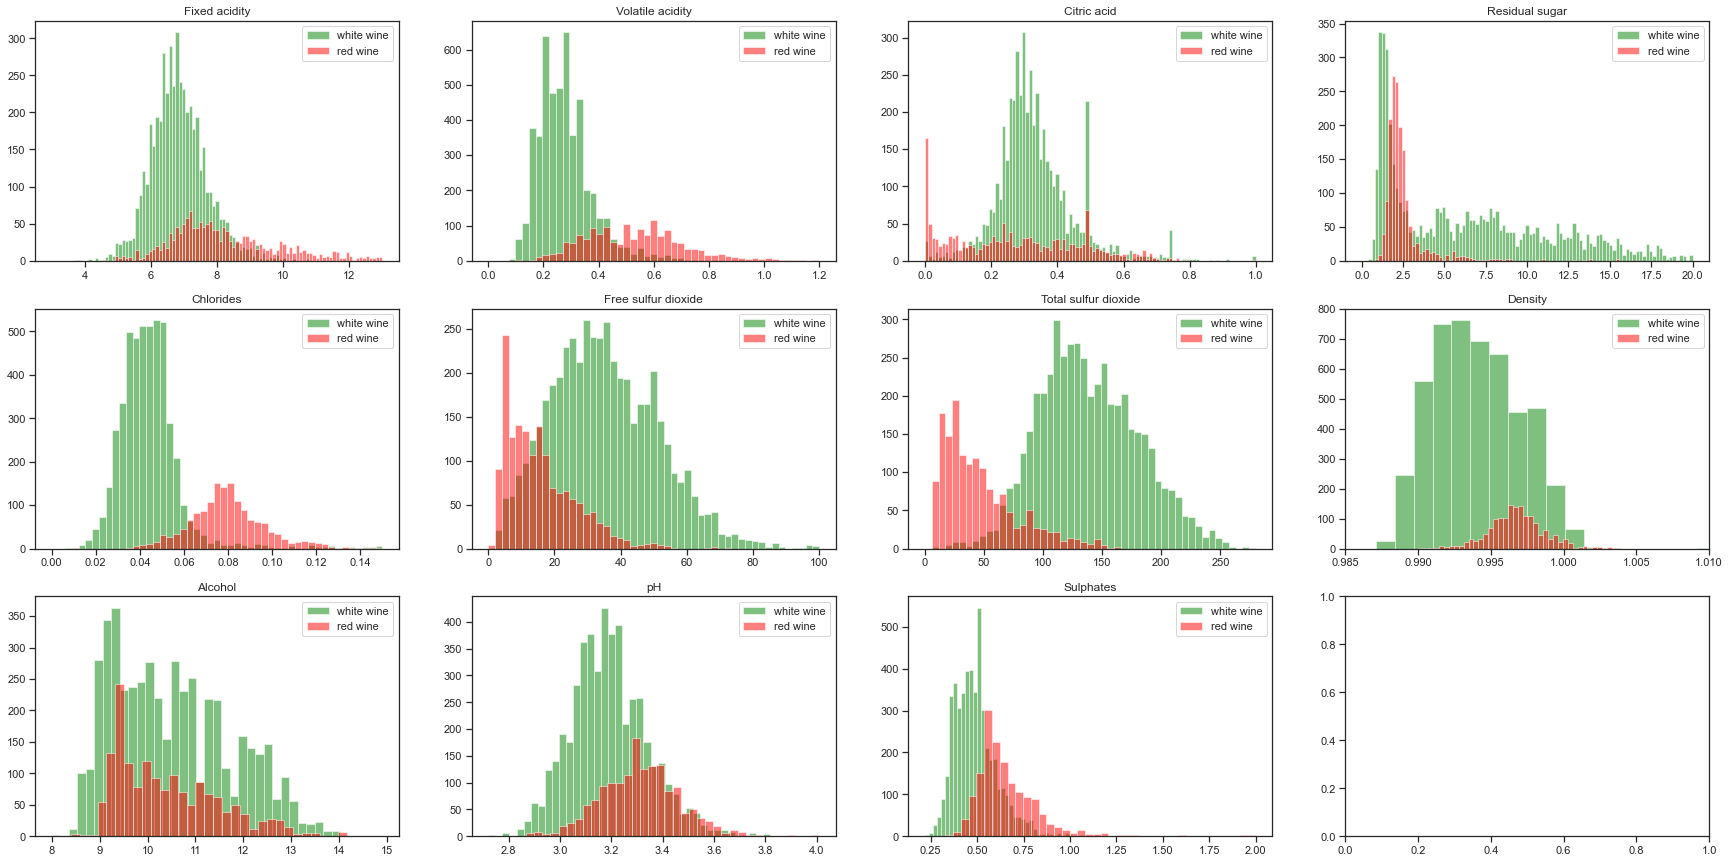

In [17]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))

bins = np.linspace(3, 13, 100)
axs[0,0].hist(white_wine['fixed acidity'], bins, alpha=0.5, label='white wine', color="green")
axs[0,0].hist(red_wine['fixed acidity'], bins, alpha=0.5, label='red wine', color="red")
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Fixed acidity')

bins = np.linspace(0, 1.2, 50)
axs[0,1].hist(white_wine['volatile acidity'], bins, alpha=0.5, label='white wine', color="green")
axs[0,1].hist(red_wine['volatile acidity'], bins, alpha=0.5, label='red wine', color="red")
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Volatile acidity')

bins = np.linspace(0, 1, 100)
axs[0,2].hist(white_wine['citric acid'], bins, alpha=0.5, label='white wine', color="green")
axs[0,2].hist(red_wine['citric acid'], bins, alpha=0.5, label='red wine', color="red")
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Citric acid')

bins = np.linspace(0, 20, 100)
axs[0,3].hist(white_wine['residual sugar'], bins, alpha=0.5, label='white wine', color="green")
axs[0,3].hist(red_wine['residual sugar'], bins, alpha=0.5, label='red wine', color="red")
axs[0,3].legend(loc='upper right')
axs[0,3].set_title('Residual sugar')

bins = np.linspace(0, 0.15, 50)
axs[1,0].hist(white_wine['chlorides'], bins, alpha=0.5, label='white wine', color="green")
axs[1,0].hist(red_wine['chlorides'], bins, alpha=0.5, label='red wine', color="red")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Chlorides')

bins = np.linspace(0, 100, 50)
axs[1,1].hist(white_wine['free sulfur dioxide'], bins, alpha=0.5, label='white wine', color="green")
axs[1,1].hist(red_wine['free sulfur dioxide'], bins, alpha=0.5, label='red wine', color="red")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Free sulfur dioxide')

bins = np.linspace(0, 280, 50)
axs[1,2].hist(white_wine['total sulfur dioxide'], bins, alpha=0.5, label='white wine', color="green")
axs[1,2].hist(red_wine['total sulfur dioxide'], bins, alpha=0.5, label='red wine', color="red")
axs[1,2].legend(loc='upper right')
axs[1,2].set_title('Total sulfur dioxide')

axs[1,3].hist(white_wine['density'],bins = 40, alpha=0.5, label='white wine', color="green")
axs[1,3].hist(red_wine['density'],bins = 40, alpha=0.5, label='red wine', color="red")
axs[1,3].legend(loc='upper right')
axs[1,3].set_xlim(0.985,1.01)
axs[1,3].set_title('Density')

axs[2,0].hist(white_wine['alcohol'],bins = 35, alpha=0.5, label='white wine', color="green")
axs[2,0].hist(red_wine['alcohol'],bins = 35, alpha=0.5, label='red wine', color="red")
axs[2,0].legend(loc='upper right')
axs[2,0].set_title('Alcohol')

axs[2,1].hist(white_wine['pH'],bins = 40, alpha=0.5, label='white wine', color="green")
axs[2,1].hist(red_wine['pH'],bins = 40, alpha=0.5, label='red wine', color="red")
axs[2,1].legend(loc='upper right')
axs[2,1].set_title('pH')

axs[2,2].hist(white_wine['sulphates'],bins = 40, alpha=0.5, label='white wine', color="green")
axs[2,2].hist(red_wine['sulphates'],bins = 40, alpha=0.5, label='red wine', color="red")
axs[2,2].legend(loc='upper right')
axs[2,2].set_title('Sulphates')

From the figure, it tells that the distribution of attributes in both wines are different which means both types have different importance features to get high quality.

### Distribution of Red wine

Red Wine


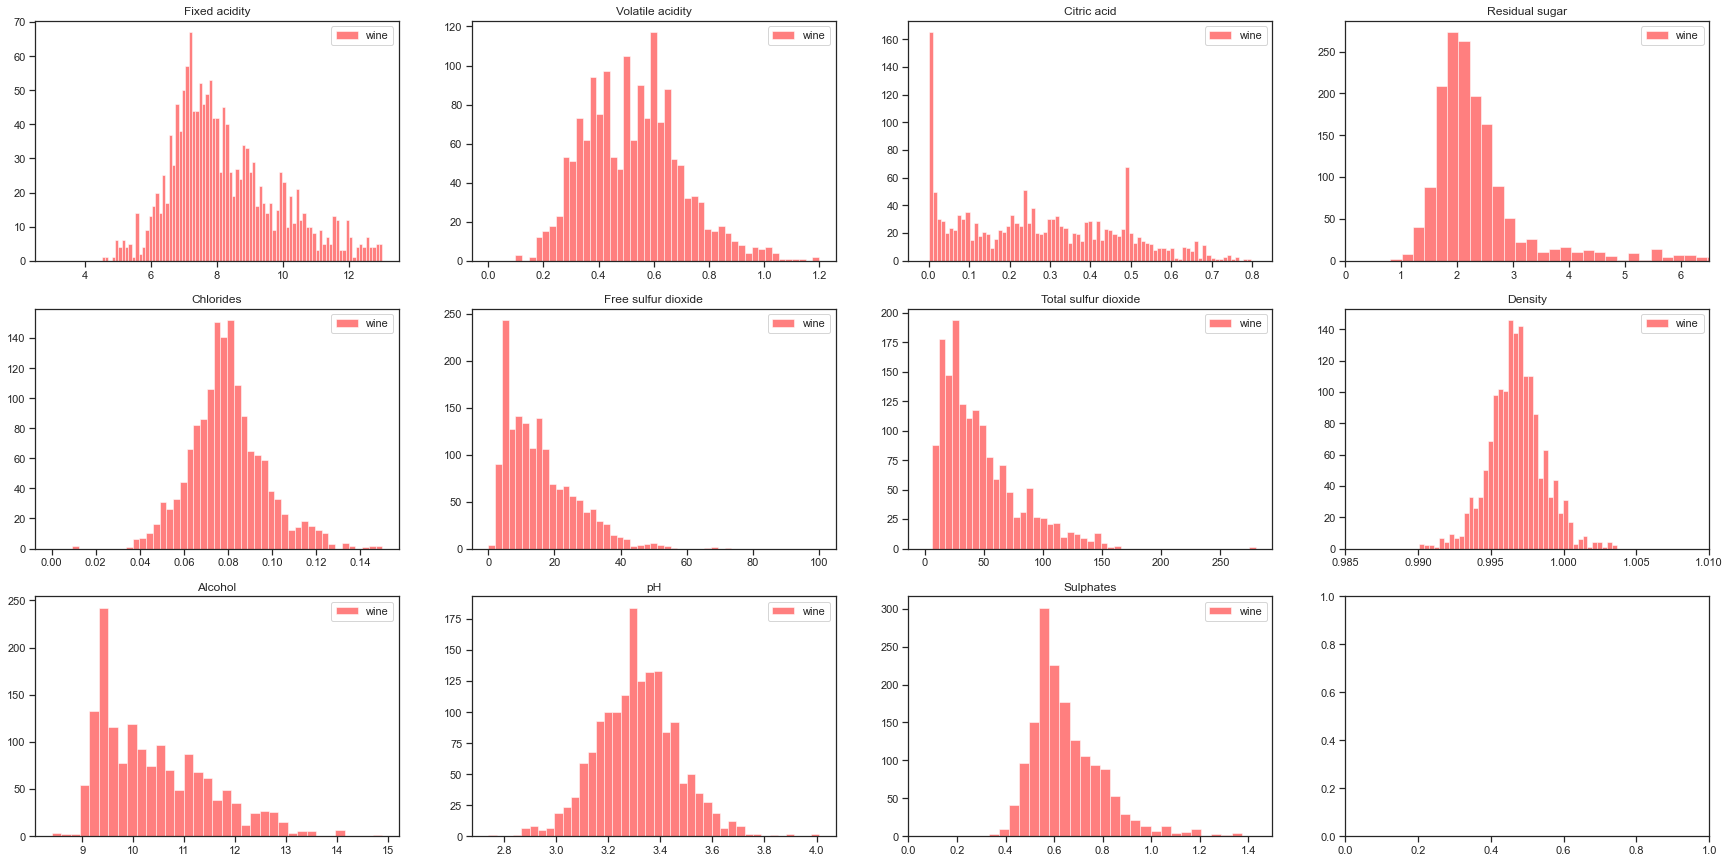

In [18]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))

bins = np.linspace(3, 13, 100)
axs[0,0].hist(red_wine['fixed acidity'], bins, alpha=0.5, label='wine', color="red")
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Fixed acidity')

bins = np.linspace(0, 1.2, 50)
axs[0,1].hist(red_wine['volatile acidity'], bins, alpha=0.5, label='wine', color="red")
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Volatile acidity')

bins = np.linspace(0, 1, 100)
axs[0,2].hist(red_wine['citric acid'], bins, alpha=0.5, label='wine', color="red")
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Citric acid')
axs[0,2].set_xlim([-0.05, 0.85])

bins = np.linspace(0, 20, 100)
axs[0,3].hist(red_wine['residual sugar'], bins, alpha=0.5, label='wine', color="red")
axs[0,3].legend(loc='upper right')
axs[0,3].set_title('Residual sugar')
axs[0,3].set_xlim([0, 6.5])

bins = np.linspace(0, 0.15, 50)
axs[1,0].hist(red_wine['chlorides'], bins, alpha=0.5, label='wine', color="red")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Chlorides')

bins = np.linspace(0, 100, 50)
axs[1,1].hist(red_wine['free sulfur dioxide'], bins, alpha=0.5, label='wine', color="red")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Free sulfur dioxide')

bins = np.linspace(0, 280, 50)
axs[1,2].hist(red_wine['total sulfur dioxide'], bins, alpha=0.5, label='wine', color="red")
axs[1,2].legend(loc='upper right')
axs[1,2].set_title('Total sulfur dioxide')

axs[1,3].hist(red_wine['density'],bins = 40, alpha=0.5, label='wine', color="red")
axs[1,3].legend(loc='upper right')
axs[1,3].set_xlim(0.985,1.01)
axs[1,3].set_title('Density')

axs[2,0].hist(red_wine['alcohol'],bins = 35, alpha=0.5, label='wine', color="red")
axs[2,0].legend(loc='upper right')
axs[2,0].set_title('Alcohol')

axs[2,1].hist(red_wine['pH'],bins = 40, alpha=0.5, label='wine', color="red")
axs[2,1].legend(loc='upper right')
axs[2,1].set_title('pH')

axs[2,2].hist(red_wine['sulphates'],bins = 40, alpha=0.5, label='wine', color="red")
axs[2,2].legend(loc='upper right')
axs[2,2].set_title('Sulphates')
axs[2,2].set_xlim([0, 1.5])
print("Red Wine")

From figure, there are 4 attributes that are obviously right-skewed,
- Free sulfur dioxide
- Total sulfur dioxide
- Alcohol
- Sulphates

We will need to make a data transform to normal distribution before put into the model.

But for some attribute that cannot speficity the type of distribution like citric acid. We don't know how to handle with it.

### Distribution of White Wine

Wine histogram


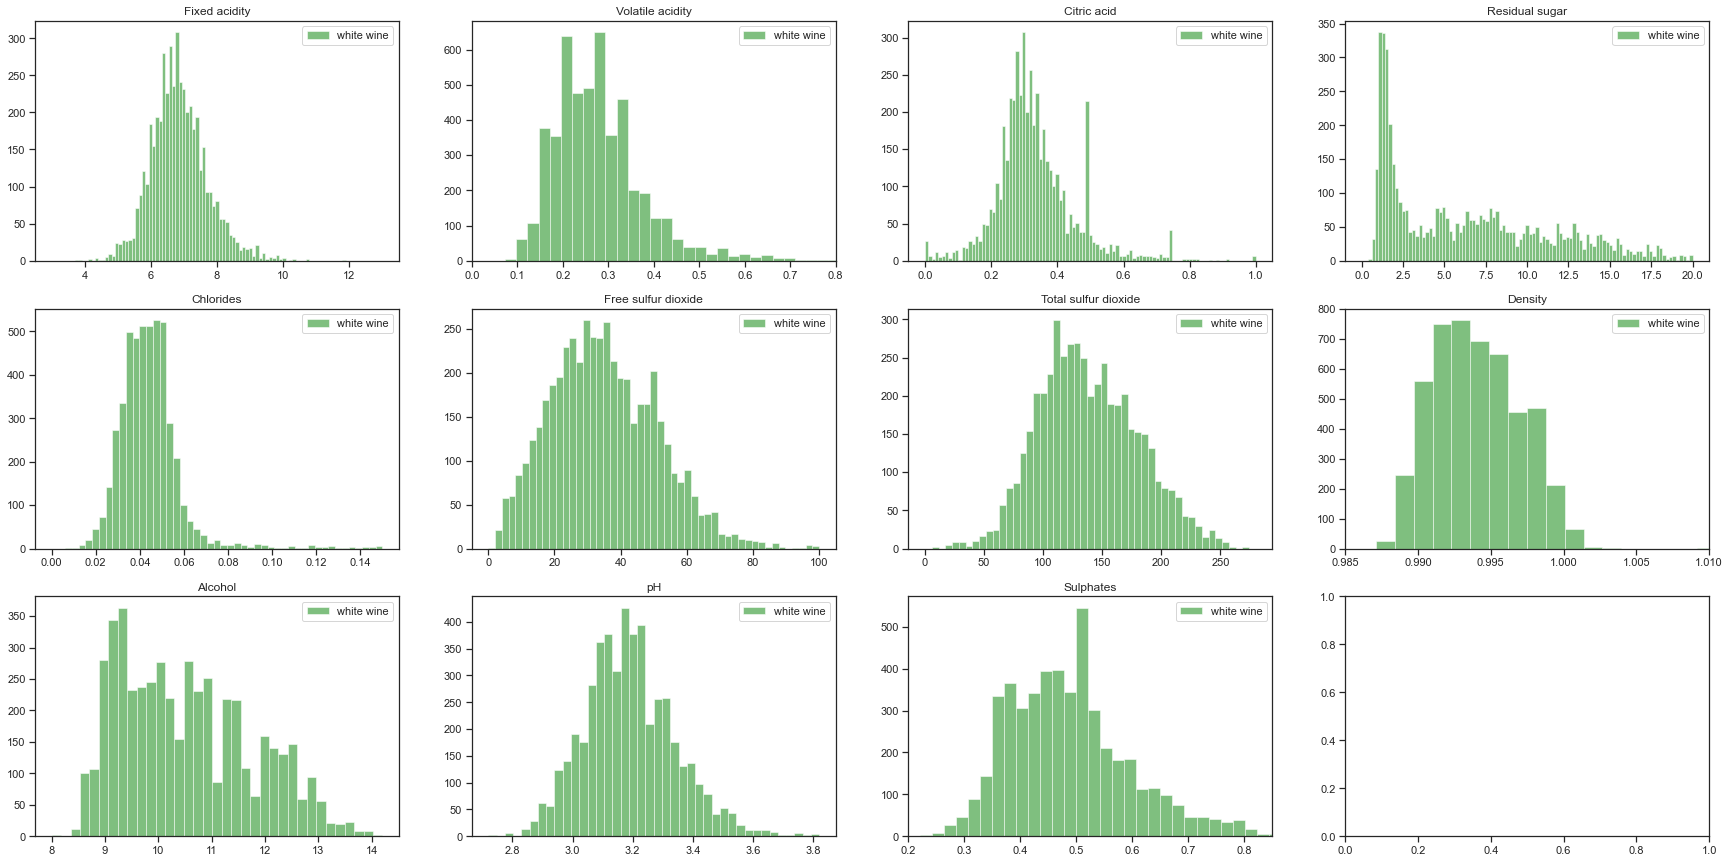

In [19]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))

bins = np.linspace(3, 13, 100)
axs[0,0].hist(white_wine['fixed acidity'], bins, alpha=0.5, label='white wine', color="green")
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Fixed acidity')

bins = np.linspace(0, 1.2, 50)
axs[0,1].hist(white_wine['volatile acidity'], bins, alpha=0.5, label='white wine', color="green")
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Volatile acidity')
axs[0,1].set_xlim(0,0.8)

bins = np.linspace(0, 1, 100)
axs[0,2].hist(white_wine['citric acid'], bins, alpha=0.5, label='white wine', color="green")
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Citric acid')

bins = np.linspace(0, 20, 100)
axs[0,3].hist(white_wine['residual sugar'], bins, alpha=0.5, label='white wine', color="green")
axs[0,3].legend(loc='upper right')
axs[0,3].set_title('Residual sugar')

bins = np.linspace(0, 0.15, 50)
axs[1,0].hist(white_wine['chlorides'], bins, alpha=0.5, label='white wine', color="green")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Chlorides')

bins = np.linspace(0, 100, 50)
axs[1,1].hist(white_wine['free sulfur dioxide'], bins, alpha=0.5, label='white wine', color="green")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Free sulfur dioxide')

bins = np.linspace(0, 280, 50)
axs[1,2].hist(white_wine['total sulfur dioxide'], bins, alpha=0.5, label='white wine', color="green")
axs[1,2].legend(loc='upper right')
axs[1,2].set_title('Total sulfur dioxide')

axs[1,3].hist(white_wine['density'],bins = 40, alpha=0.5, label='white wine', color="green")
axs[1,3].legend(loc='upper right')
axs[1,3].set_xlim(0.985,1.01)
axs[1,3].set_title('Density')

axs[2,0].hist(white_wine['alcohol'],bins = 35, alpha=0.5, label='white wine', color="green")
axs[2,0].legend(loc='upper right')
axs[2,0].set_title('Alcohol')

axs[2,1].hist(white_wine['pH'],bins = 40, alpha=0.5, label='white wine', color="green")
axs[2,1].legend(loc='upper right')
axs[2,1].set_title('pH')

axs[2,2].hist(white_wine['sulphates'],bins = 40, alpha=0.5, label='white wine', color="green")
axs[2,2].legend(loc='upper right')
axs[2,2].set_title('Sulphates')
axs[2,2].set_xlim(0.2,0.85)

print("Wine histogram")

From figure, there are 2 attributes that are obviously right-skewed,
- Residual sugar
- Alcohol

We will need to make a data transform to normal distribution before put into the model.

## Feature Association

In feature association, we will use heat map to first scan the attributes that have some relationship with each other.

### Red Wine

<AxesSubplot:>

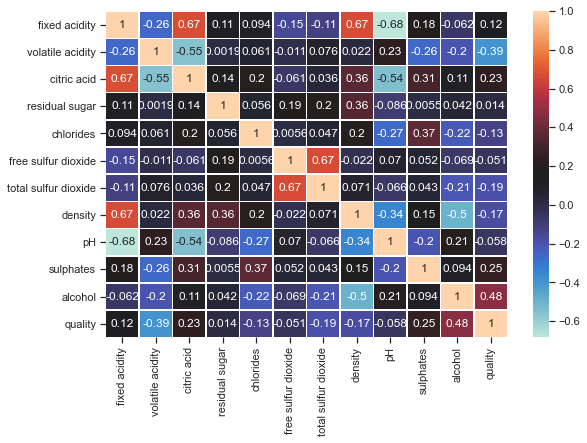

In [20]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(red_wine.corr(), annot=True, linewidths=.5, ax=ax,cmap="icefire")

From the table, the features that could have some relationship (|coefficient| more than 0.35) are
- `fixed acidity-citric acid`
- `fixed acidity-density`
- `fixed acidity-pH`
- `volatile acidity-citric acid`
- `volatile acidity-quality`
- `citric acid-density`
- `citric acid-pH`
- `residual sugar-density`
- `chlorides-sulphates`
- `free sulfur dioxide-total sulfur dioxide`
- `density-alcohol`
- `density-pH`
- `alcohol-quality`


And also if we focus on output class (quality) and other attributes. there are some attributes that could have some relationship with quality but the coefficient is not high that much (>0.1). We are going to see them too which consists of
- `fixed acidity - quality`
- `citric acid - quality`
- `chlorides - quality`
- `total sulfur dioxide - quality`
- `density - quality`

Next, we will use scatter plot and box plot to see the relationship inside.

#### fixed acidity-citric acid

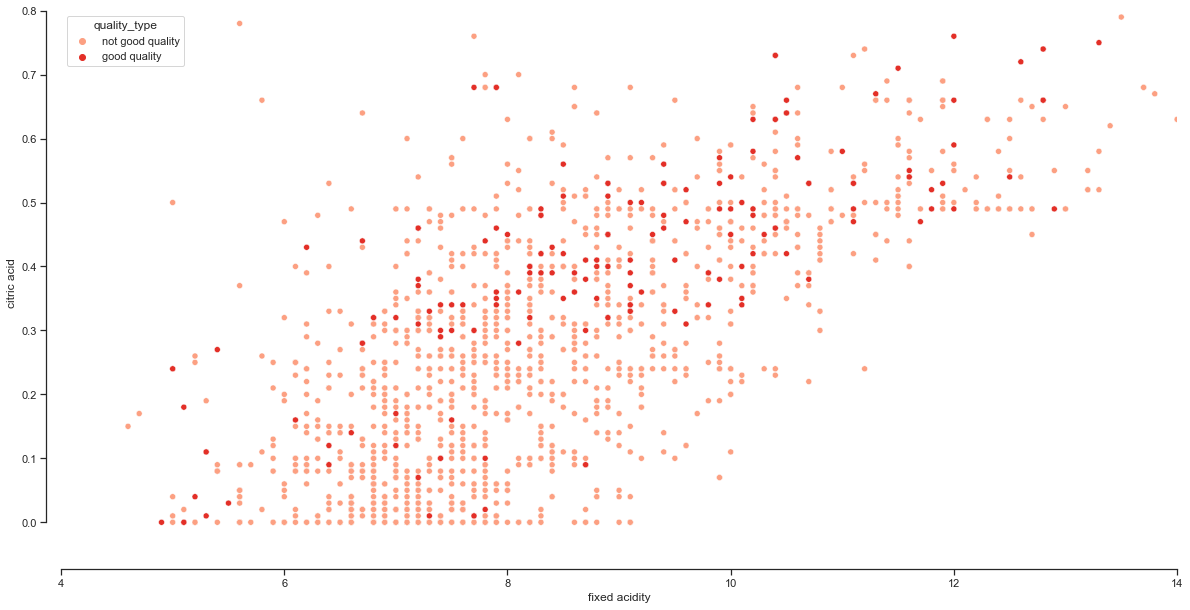

In [21]:
plt.figure(figsize=(20,10))
plt.xlim(4,14)
plt.ylim(-0.05, 0.8)
sns.scatterplot(x="fixed acidity", y="citric acid",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between fixed acidity and citric acid don't have any association with quality as you can see from sparse of quality from hue color. But if we analyze on seperately attribute, we will see that the good quality of red wine are at citric acid around 0.3-0.8.

#### fixed acidity-density

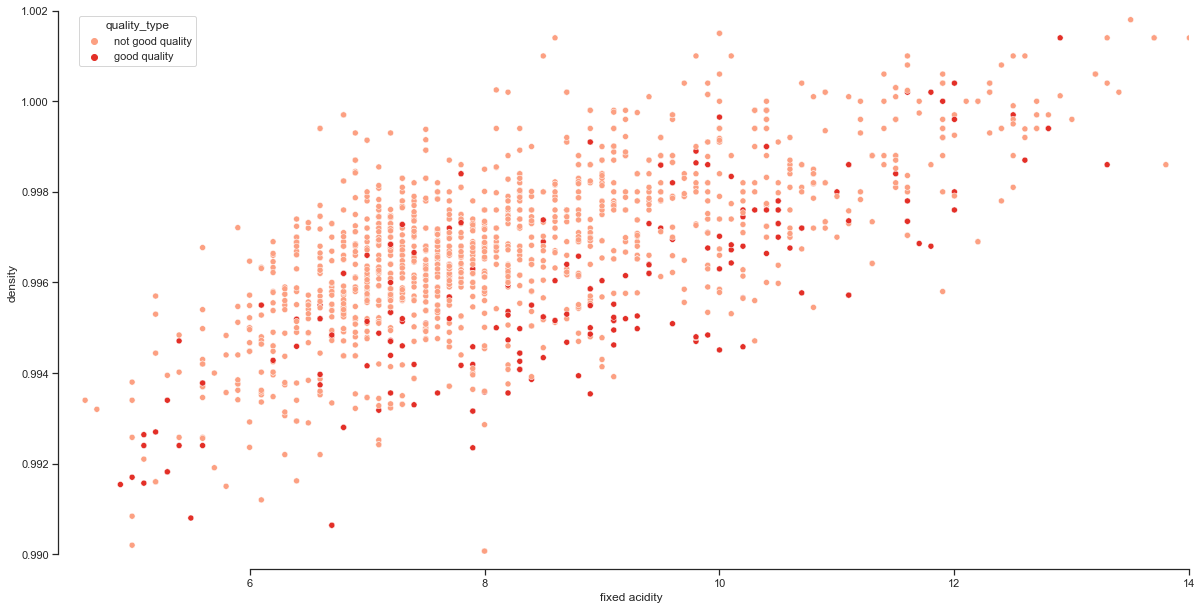

In [22]:
plt.figure(figsize=(20,10))
plt.xlim(4.5, 14)
plt.ylim(0.990, 1.002)
sns.scatterplot(x="fixed acidity", y="density",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between fixed acidity and density have some trend to get good wine quality as you can see from the increasing of density, the fixed acidity should increase at some constant to get the good wine quality.

#### fixed acidity-pH

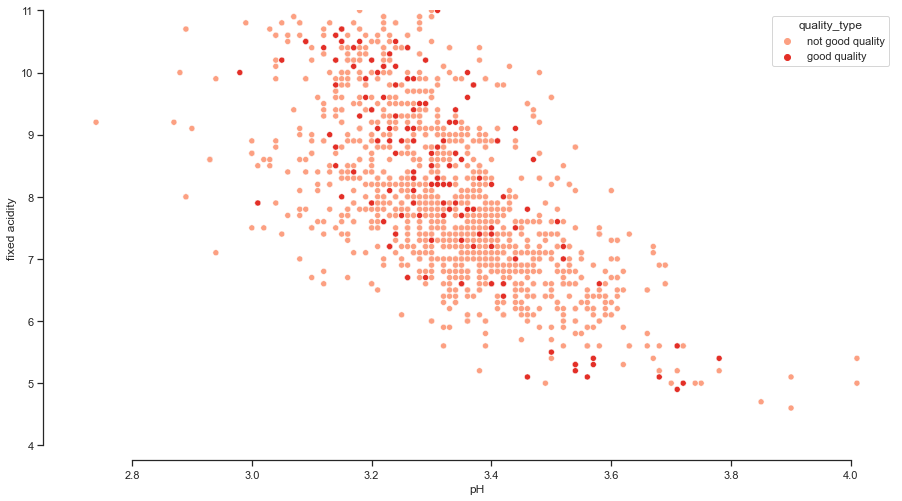

In [23]:
plt.figure(figsize=(15,8))
# plt.xlim(0, 30)
plt.ylim(4, 11)
sns.scatterplot(x="pH", y="fixed acidity",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between fixed acidity and pH don't have any association with quality as you can see from sparse of quality from hue color.

#### volatile acidity-citric acid

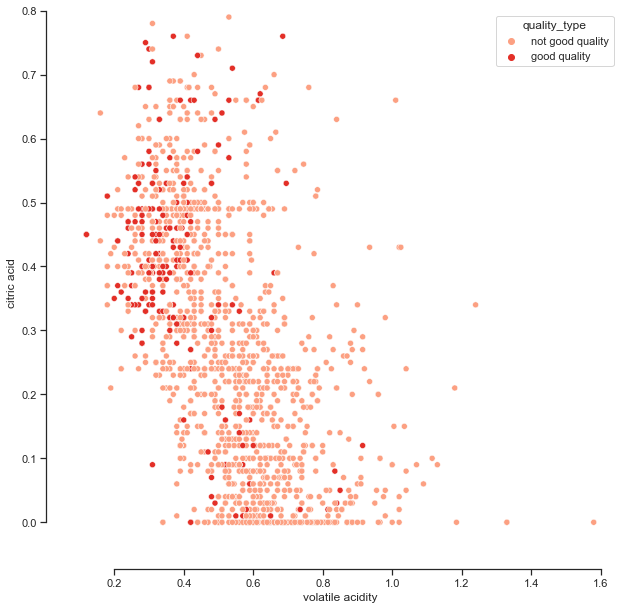

In [24]:
plt.figure(figsize=(10,10))
# plt.xlim(0, 30)
plt.ylim(-0.05, 0.8)
sns.scatterplot(x="volatile acidity", y="citric acid",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between volatile acidity and citric acid don't have any association with quality directly. But this graph, if we focus on color, the good quality of wine is stay at volatile aciditiy around 0.2-0.6 and citric acid around 0.3-0.8.

#### volatile acidity-quality

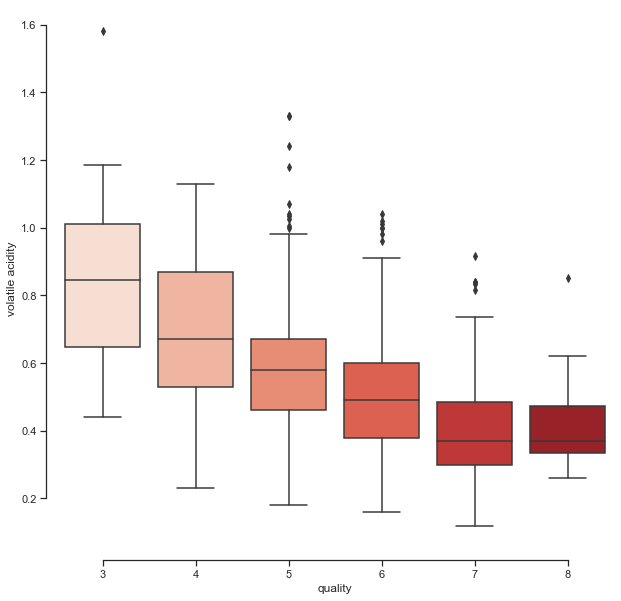

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="quality", y="volatile acidity",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

We use quality score 3-8 to get more clearly understand distribution of volatile acidity on quality. Relation between quality and volatile acidity, it is very obvious that the good quality of red wine usually have volatile acidity around 0.2-0.8.

#### citric acid-density

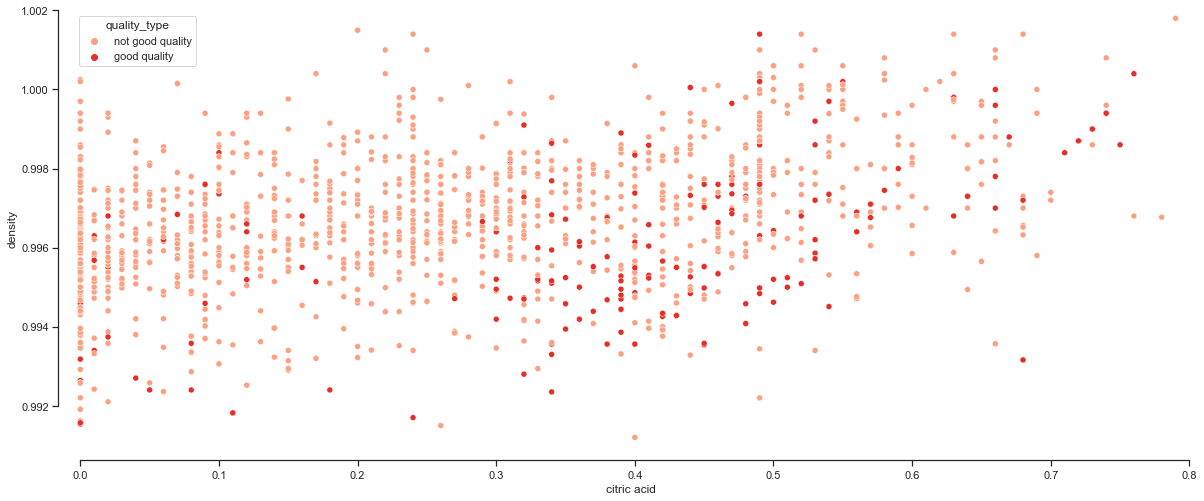

In [26]:
plt.figure(figsize=(20,8))
plt.xlim(-0.005,0.8)
plt.ylim(0.991,1.002)
sns.scatterplot(x="citric acid", y="density",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between density and citric acid don't have any association with quality directly.  But this graph if we analyze quality with separately attribute, good quality of red wine are usually at citric acid around 0.3-0.7, but sparse in every value of density.

#### citric acid-pH

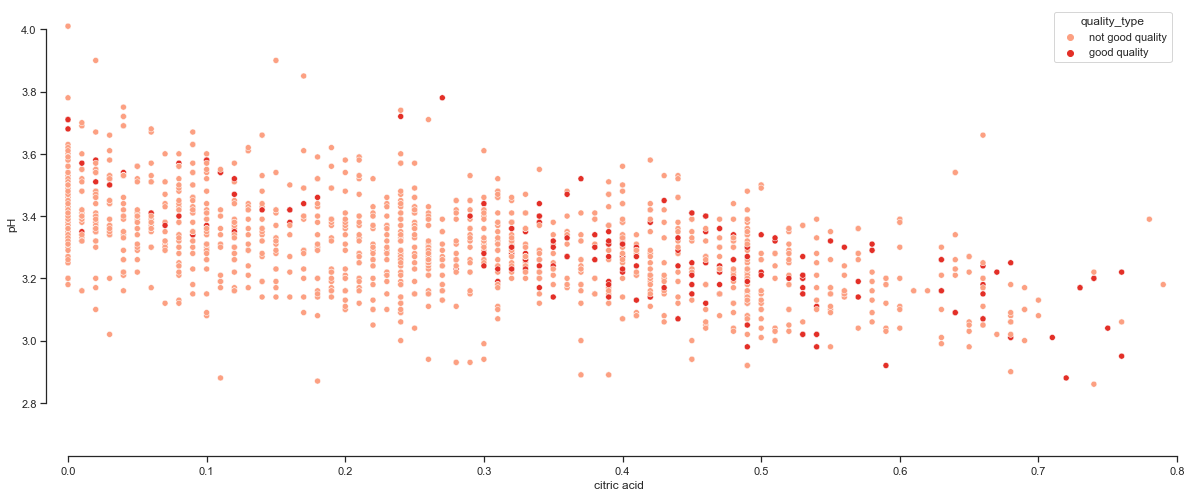

In [27]:
plt.figure(figsize=(20,8))
plt.xlim(-0.005,0.8)
# plt.ylim(0.986,1.005)
sns.scatterplot(x="citric acid", y="pH",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between density and citric acid don't have any association with quality directly.  But this graph if we analyze quality with separately attribute,  the good quality of red wine are usually at citric acid around 0.3-0.7, but sparse in every value of pH.

#### residual sugar-density

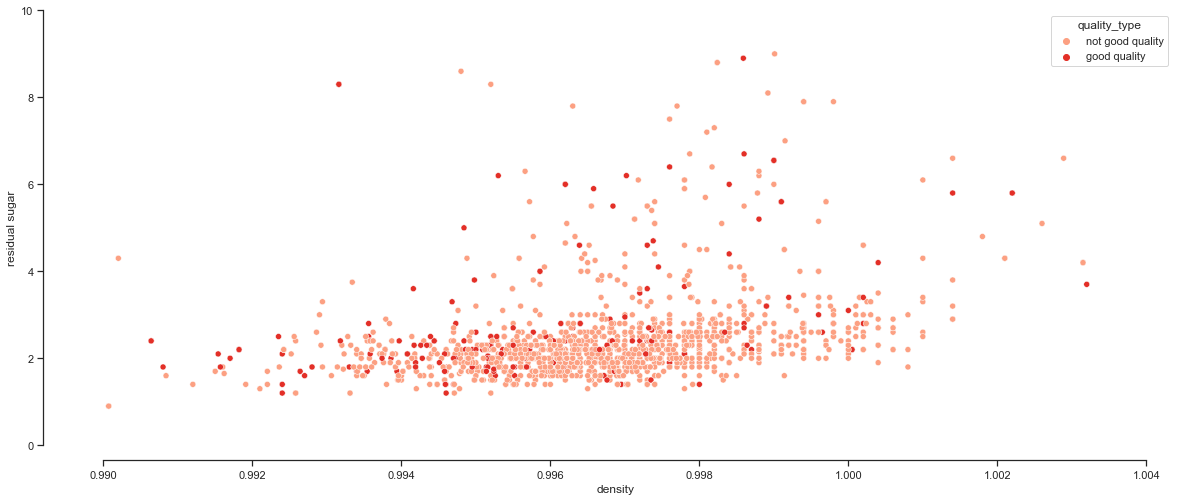

In [28]:
plt.figure(figsize=(20,8))
# plt.xlim(0.9867,1.003)
plt.ylim(0,10)
sns.scatterplot(x="density", y="residual sugar",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between fixed acidity and pH don't have any association with quality as you can see from sparse of quality from hue color.

#### chlorides-sulphates

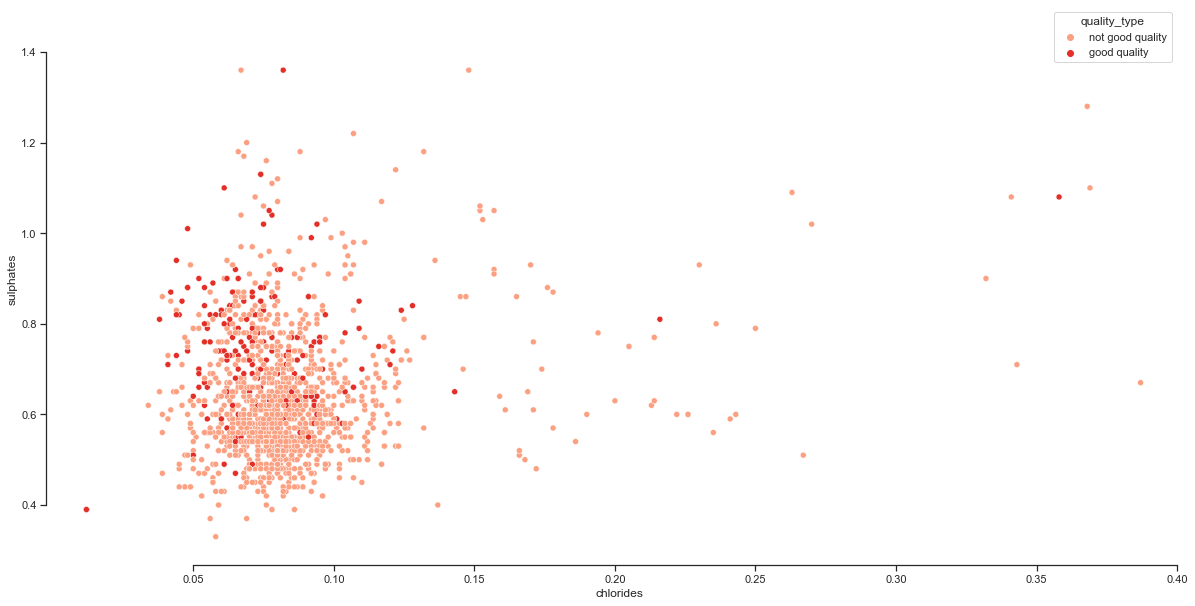

In [29]:
plt.figure(figsize=(20,10))
plt.xlim(0.003,0.4)
plt.ylim(0.3,1.50)
sns.scatterplot(x="chlorides", y="sulphates",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between density and citric acid don't have any association with quality directly. But this graph if we focus on attribute separately, the good quality of red wine are usually at sulphates around 0.6-1.0 and chlorides at around 0.05-0.10.

#### free sulfur dioxide-total sulfur dioxide

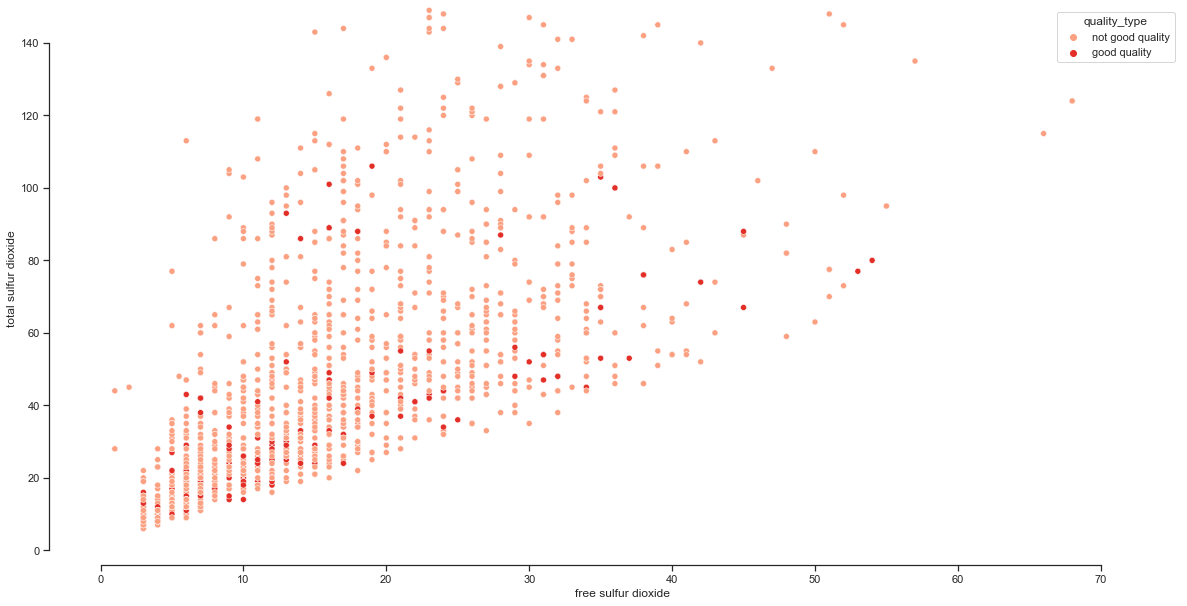

In [30]:
plt.figure(figsize=(20,10))
# plt.xlim(0.1,0.8)
plt.ylim(0,150)
sns.scatterplot(x="free sulfur dioxide", y="total sulfur dioxide",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between density and citric acid have trend to have association with quality as you can see from group of good wine quality at the bottom of scatter.

#### density-alcohol

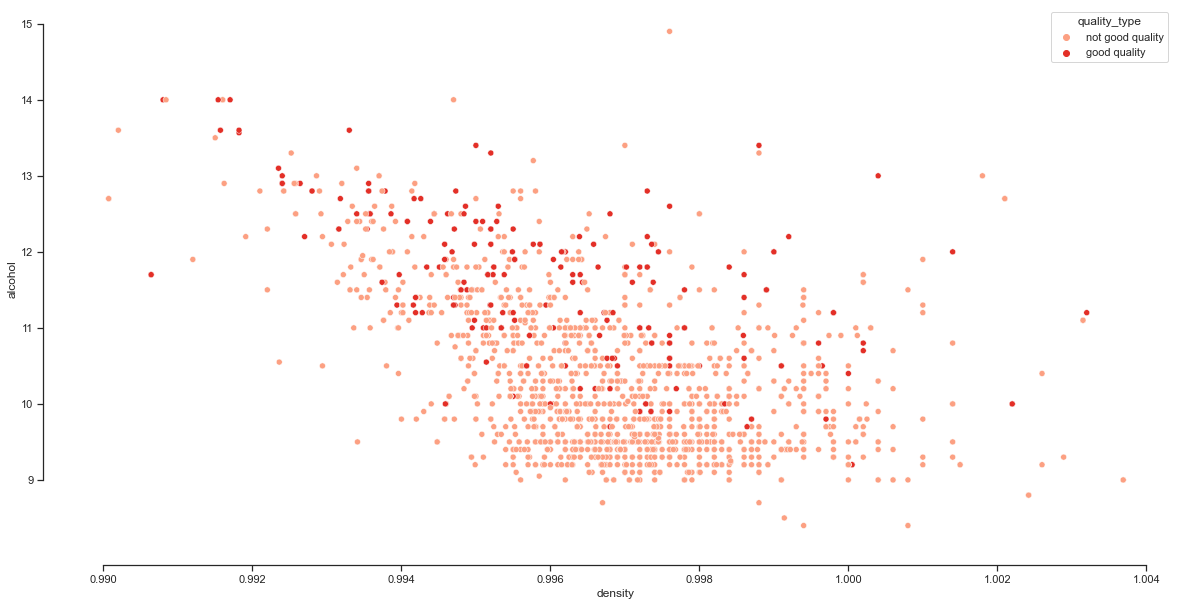

In [31]:
plt.figure(figsize=(20,10))
# plt.xlim(0.1,0.8)
# plt.ylim(0,150)
sns.scatterplot(x="density", y="alcohol",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between density and citric acid don't have any association with quality directly.  But this graph if we analyze quality with separately attribute,  the good quality of red wine are usually at alcohol more than 10, but sparse in every value of density.

#### density-pH

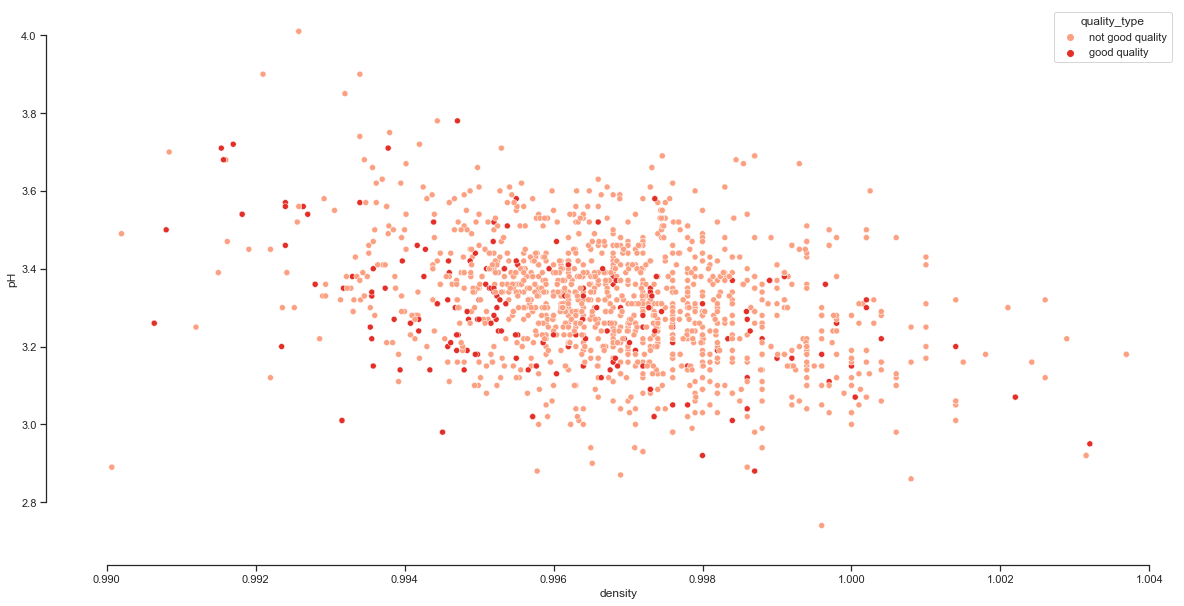

In [32]:
plt.figure(figsize=(20,10))
# plt.xlim(0.1,0.8)
# plt.ylim(0,150)
sns.scatterplot(x="density", y="pH",data=red_wine,hue="quality_type",palette="Reds")
sns.despine(offset=15, trim=True)

Relation between density and pH don't have any association with quality as you can see from sparse of quality from hue color.

#### alcohol-quality

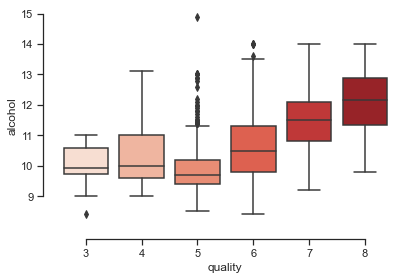

In [33]:
sns.boxplot(x="quality", y="alcohol",data=red_wine,palette="Reds")
sns.despine(offset=15, trim=True)

It is very obvious that more alcohol, more quality of wine.

#### fixed acidity - quality

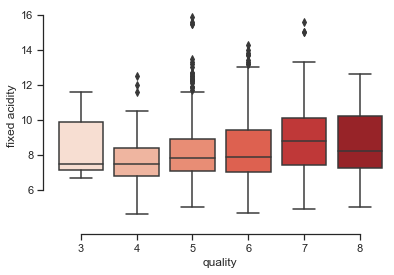

In [34]:
sns.boxplot(x="quality", y="fixed acidity",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

Fixed acidity looks doesn'thave any association with quality of red wine

#### citric acid - quality

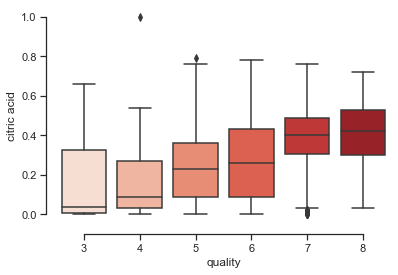

In [35]:
sns.boxplot(x="quality", y="citric acid",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

From the distribution of citric acid, citric acid around 0.3-0.5 could get the high quality of wine

#### chlorides - quality

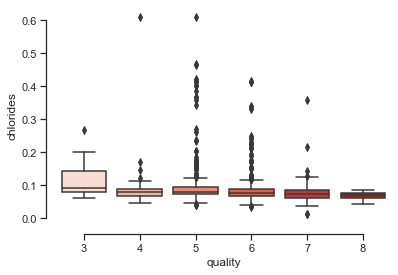

In [36]:
sns.boxplot(x="quality", y="chlorides",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

The association between chlorides is actually hard to analyze because of outlier.\
But our group think that the small values of chlorides could have some association\
when chloride is small as you can see the quality 7-8.

#### total sulfur dioxide - quality

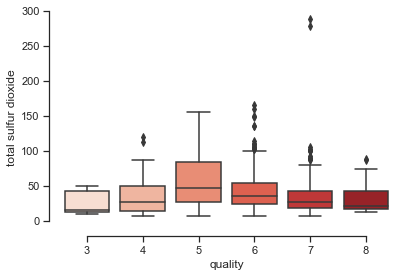

In [37]:
sns.boxplot(x="quality", y="total sulfur dioxide",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

The total sulfur dioxide around 0-50 can be both good quality and not good quality\
of wines. But if we see the relationship between total sulfur dioxide and free sulfur\
dioxide associate to quality, the relationship of total sulfur dioxide and free sulfur\
dioxide could have some associations to the quality.

#### density - quality

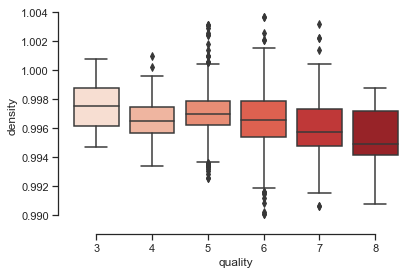

In [38]:
sns.boxplot(x="quality", y="density",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

The density could have little association with quality. But not too obvious.

From every graph above, the attributes that could have association with red wine quality are
- citric acid
- volatile acid
- sulphites
- chlorides
- [total sulfur dioxide, free sulfur dioxide]
- [fixed acidity, density]
- alcohol
- density

And the attributes that couldn't have any association with red wine quality are
- fixed acidity
- pH

There are only one attribute left that not on the list and we should make sure that does it has any association with quality or not. That attribute is residual sugar and we will find association between residual sugar and quality by using boxplot.

#### quality - residual sugar

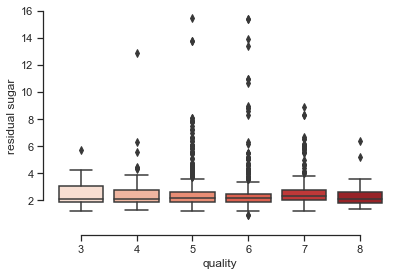

In [39]:
sns.boxplot(x="quality", y="residual sugar",data=red_wine,palette="Reds")
sns.despine(offset=10, trim=True)

From the result, residual sugar look doesn't have any association with red wine quality.

So, the feature selection are
- citric acid
- volatile acid
- sulphites
- chlorides
- [total sulfur dioxide - free sulfur dioxide]
- [fixed acidity - density]
- alcohol
- density

And we will remove these 3 attributes
- pH
- residual sugar

### White Wine

<AxesSubplot:>

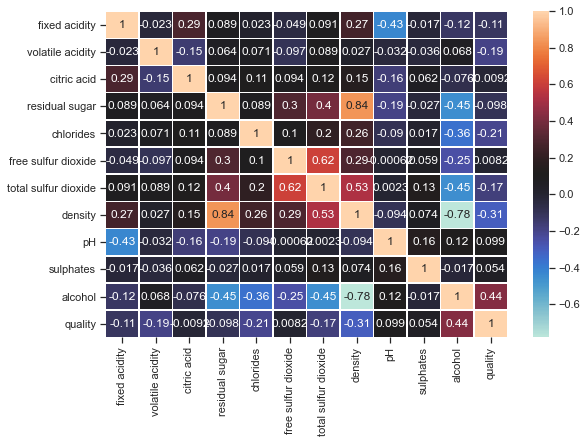

In [40]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(white_wine.corr(), annot=True, linewidths=.5, ax=ax,cmap="icefire")

From the table, the features that could have some relationship (|coefficient| more than 0.35) are
- `fixed acidity-pH`
- `residual sugar-total sulfur dioxide`
- `residual sugar - density`
- `residual sugar - alcohol`
- `chlorides - alcohol`
- `free sulfur dioxide - total sulfur dioxide`
- `total sulfur dioxide - density`
- `density-alcohol`
- `alcohol-quality`

And also if we focus on output class (quality) and other attributes. there are some attributes that could have some relationship with quality but the coefficient is not high that much (>0.15). We are going to see them too which consists of
- `volatile acidity - quality`
- `chlorides - quality`
- `total sulfur dioxide - quality`
- `density - quality`

Next, we will use scatter plot and box plot to see the relationship inside.

#### fixed acidity-pH

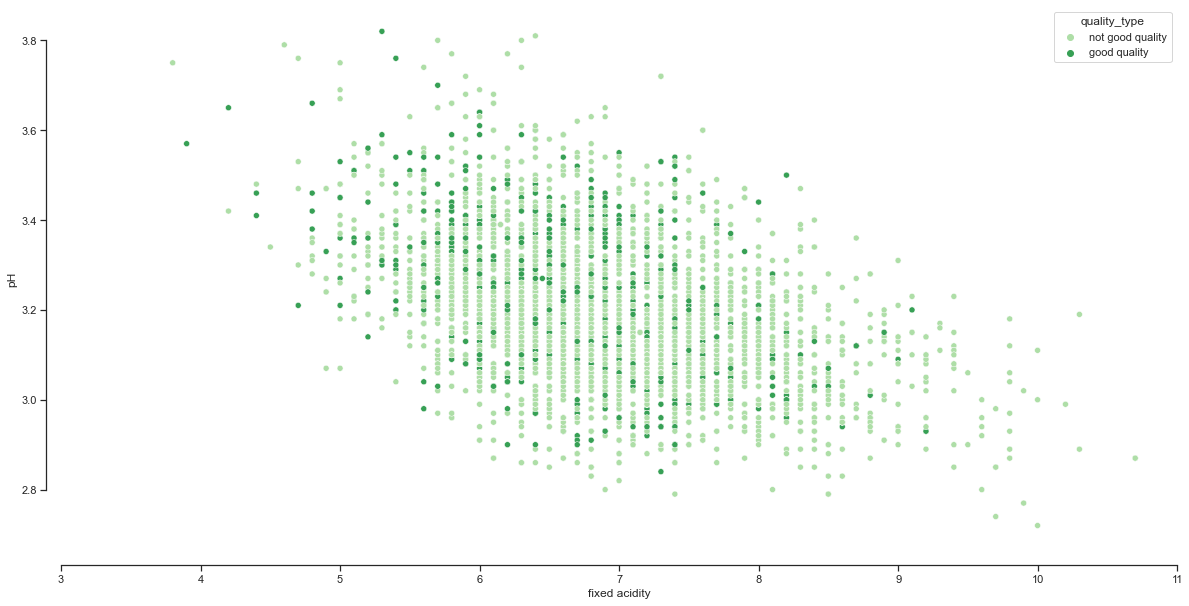

In [41]:
plt.figure(figsize=(20,10))
plt.xlim(3, 11)
sns.scatterplot(x="fixed acidity", y="pH",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

Relation between fixed acidity and pH doesn't have any association with quality as you can see from sparse of quality from hue color.

#### residual sugar-total sulfur dioxide

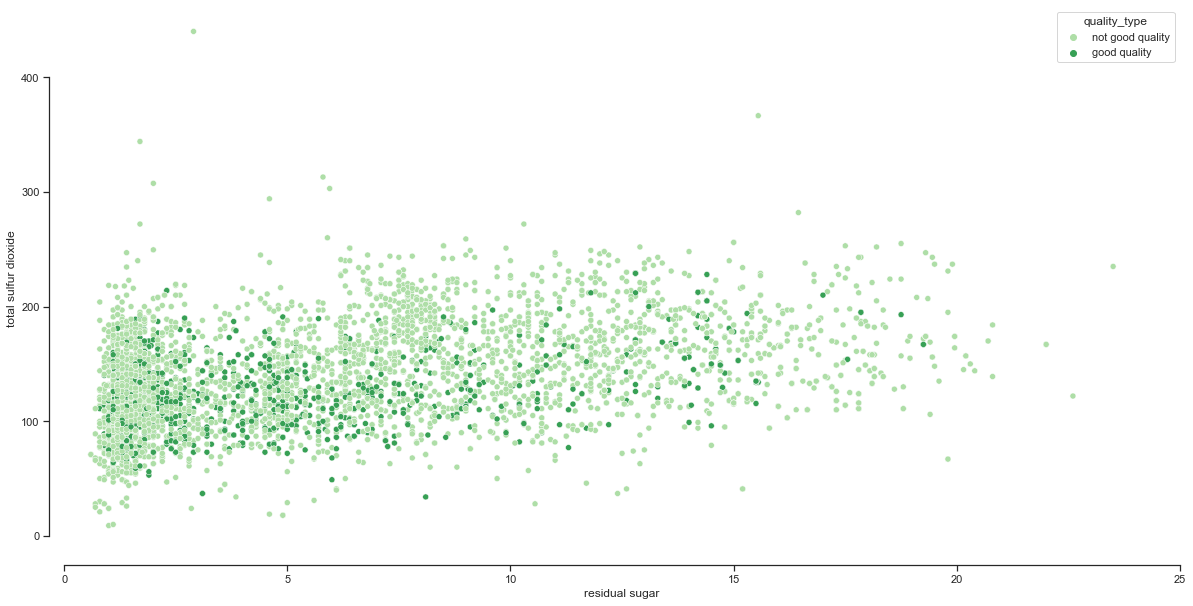

In [42]:
plt.figure(figsize=(20,10))
plt.xlim(0, 25)
sns.scatterplot(x="residual sugar", y="total sulfur dioxide",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

Relation between residual sugar and sulfur dioxide doesn't have any association with quality as you can see from sparse of quality from hue color.

#### residual sugar - density

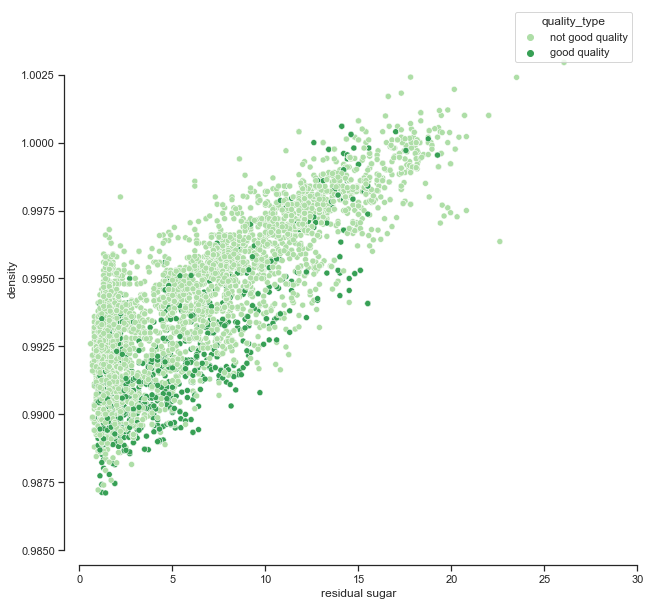

In [43]:
plt.figure(figsize=(10,10))
plt.xlim(0, 30)
plt.ylim(0.985, 1.005)
sns.scatterplot(x="residual sugar", y="density",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

Relation between residual sugar and density have some trend to get high quality of wine as you can see the hue of color.

#### residual sugar - alcohol

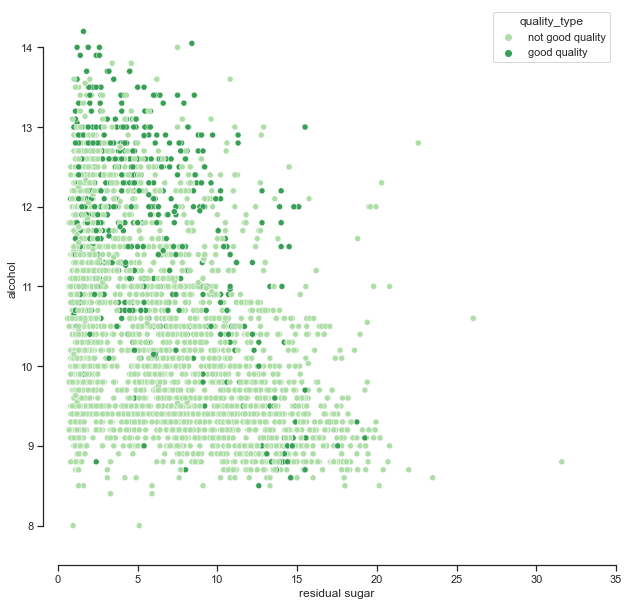

In [44]:
plt.figure(figsize=(10,10))
plt.xlim(0,35)
sns.scatterplot(x="residual sugar", y="alcohol",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

The relationship between residual sugar and alcohol don't have any association with quality of wine. But if we analyze attribute separately, we will see that the good quality of wine usually at alcohol more than 11 while sparse in every values of residual sugar.

#### chlorides - alcohol

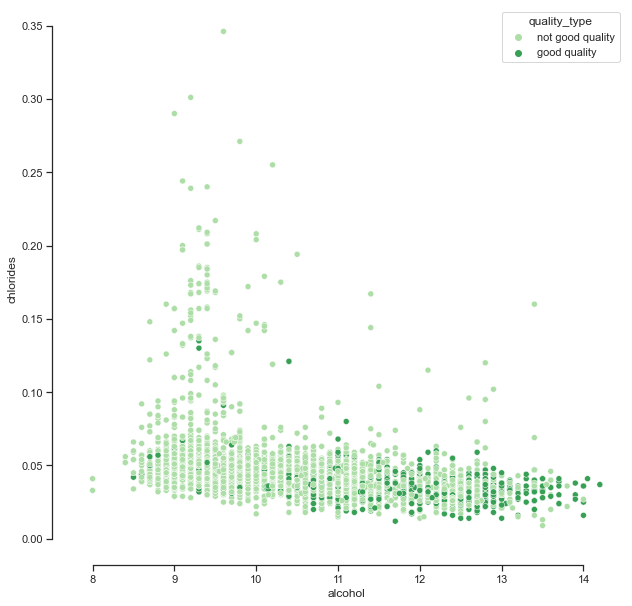

In [45]:
plt.figure(figsize=(10,10))
# plt.xlim(0,35)
sns.scatterplot(y="chlorides", x="alcohol",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

The relationship between chlorides and alcohol don't have any association with quality of wine. But if we analyze attribute separately, we will see that the good quality of wine usually at alcohol more than 11 while sparse in every values of chlorides.

#### free sulfur dioxide-total sulfur dioxide

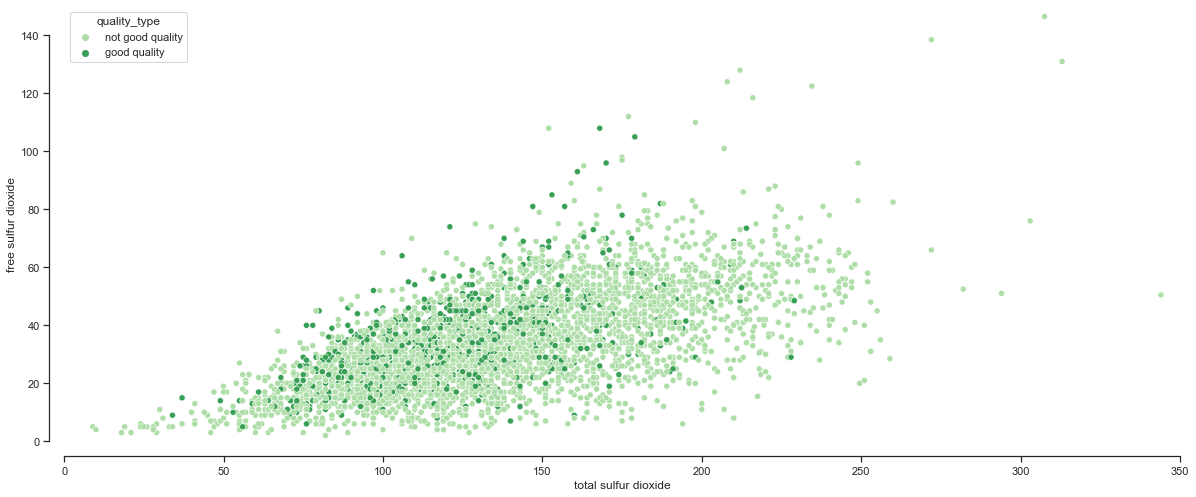

In [46]:
plt.figure(figsize=(20,8))
plt.xlim(0,350)
plt.ylim(0,150)
sns.scatterplot(x="total sulfur dioxide", y="free sulfur dioxide",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

The relationship between free sulfur dioxide and total sulfur dioxide don't have any association with quality of wine.

#### total sulfur dioxide-density

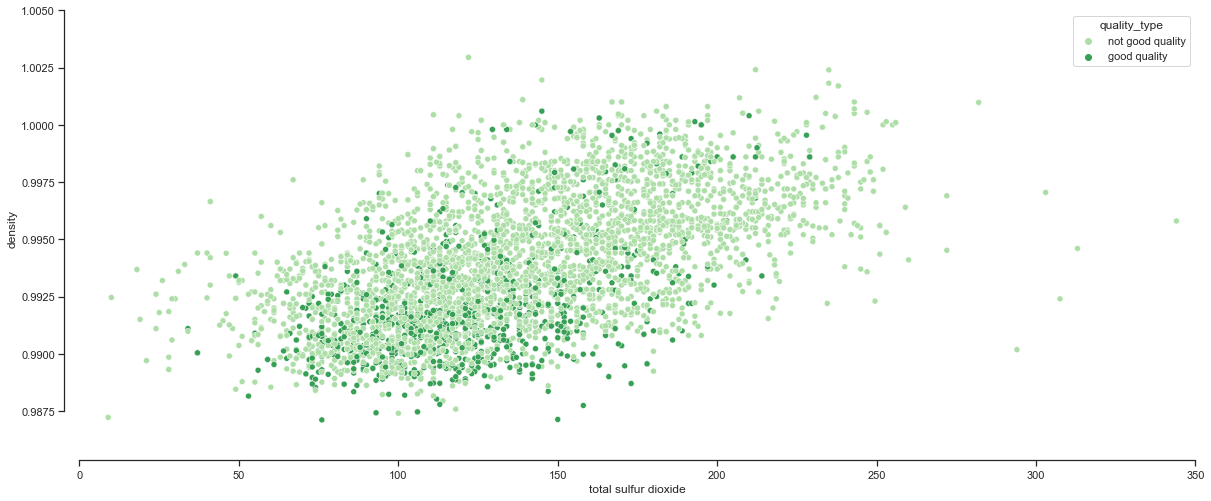

In [47]:
plt.figure(figsize=(20,8))
plt.xlim(0,350)
plt.ylim(0.986,1.005)
sns.scatterplot(x="total sulfur dioxide", y="density",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

The relationship between total sulfur dioxide and density don't have any association with quality of wine.

#### density-alcohol

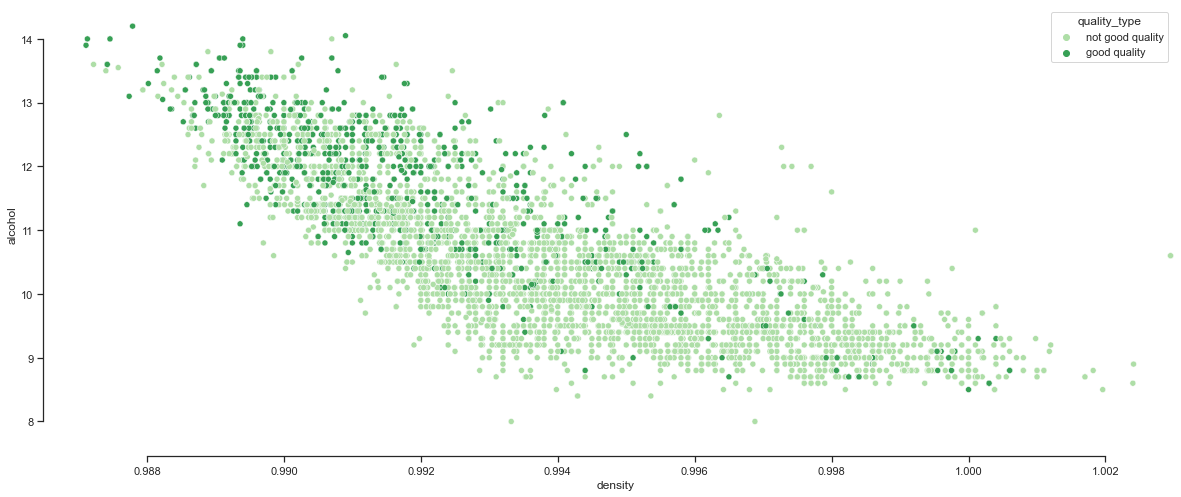

In [48]:
plt.figure(figsize=(20,8))
plt.xlim(0.9867,1.003)
# plt.ylim(0.985,1.005)
sns.scatterplot(x="density", y="alcohol",data=white_wine,hue="quality_type",palette="Greens")
sns.despine(offset=15, trim=True)

The relationship between residual sugar and alcohol don't have any association with quality of wine. But if we analyze attribute separately, we will see that the good quality of wine usually at alcohol more than 11.

#### alcohol-quality

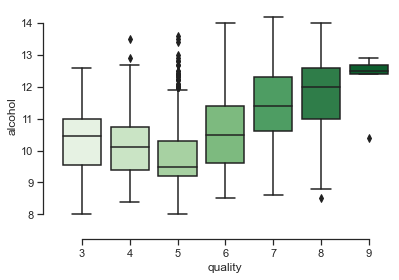

In [49]:
sns.boxplot(x="quality", y="alcohol",data=white_wine,palette="Greens")
sns.despine(offset=15, trim=True)

This graph show clearly that high alcohol, high quality

#### volatile acidity - quality

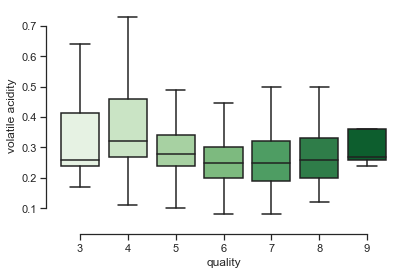

In [50]:
sns.boxplot(x="quality", y="volatile acidity",data=white_wine,palette="Greens",showfliers = False)
sns.despine(offset=10, trim=True)

From graph, when the volatile acidity is around 0.25-0.4, it has trend to get good quality of wine.

#### chlorides-quality

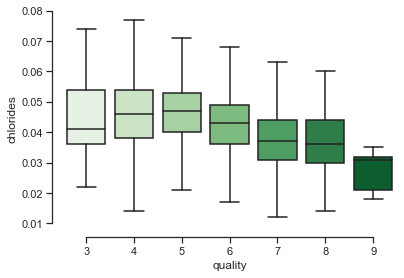

In [51]:
sns.boxplot(x="quality", y="chlorides",data=white_wine,palette="Greens",showfliers = False)
sns.despine(offset=10, trim=True)

From graph, when the chlorides is decrease, it could has trend to get good wine quality.

#### total sulfur dioxide - quality

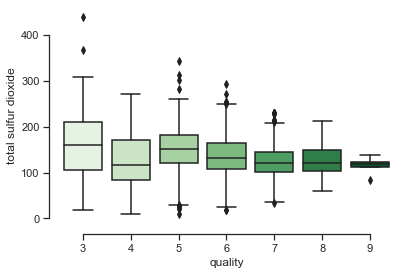

In [52]:
sns.boxplot(x="quality", y="total sulfur dioxide",data=white_wine,palette="Greens")
sns.despine(offset=10, trim=True)

From graph, when the sulfur dioxide is around 100-150, it could has trend to get good wine quality.

#### density - quality

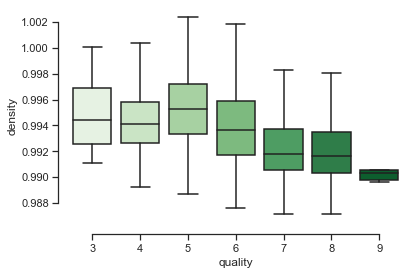

In [53]:
sns.boxplot(x="quality", y="density",data=white_wine,palette="Greens",showfliers = False)
sns.despine(offset=10, trim=True)

From graph, when the density is decrease, it could has trend to get good wine quality.

In summary from above, the attributes that could have associations are
- [residual - sugar density]
- alcohol
- density
- volatile acidity
- chloride

There are 6 attributes left that we cannot specify is it could  have association with white wine quality or not.

#### fixed acidity - quality

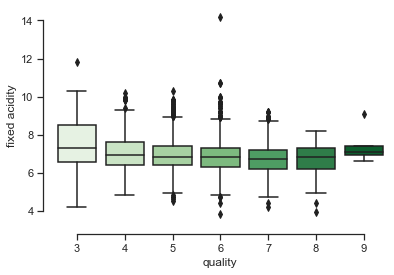

In [54]:
sns.boxplot(x="quality", y="fixed acidity",data=white_wine, palette="Greens")
sns.despine(offset=10, trim=True)

From graph, fixed acidity could have association with wine quality.

#### citric acid - quality

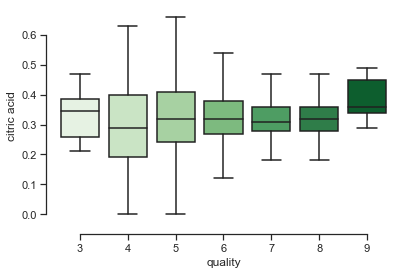

In [55]:
sns.boxplot(x="quality", y="citric acid",data=white_wine,palette="Greens",showfliers = False)
sns.despine(offset=10, trim=True)

From graph, citric acid could have association with wine quality

#### free sulfur dioxide - quality

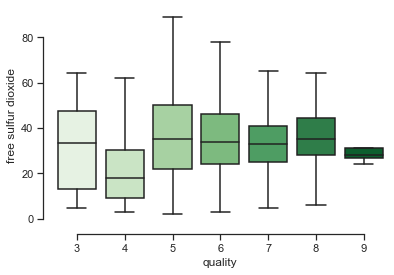

In [56]:
sns.boxplot(x="quality", y="free sulfur dioxide",data=white_wine,palette="Greens",showfliers = False)
sns.despine(offset=10, trim=True)

From graph, free sulfur dioxide could have association with wine quality.

#### total sulfur dioxide - quality

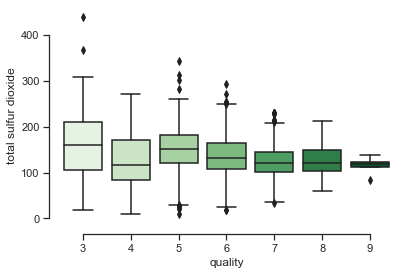

In [57]:
sns.boxplot(x="quality", y="total sulfur dioxide",data=white_wine,palette="Greens")
sns.despine(offset=10, trim=True)

From graph, total sulfur dioxide could have association with wine quality.

#### pH - quality

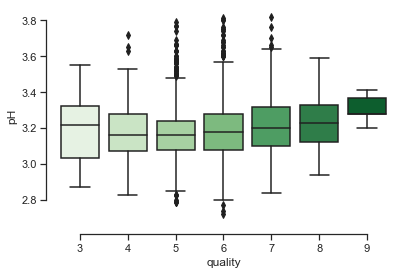

In [58]:
sns.boxplot(x="quality", y="pH",data=white_wine,palette="Greens")
sns.despine(offset=10, trim=True)

From graph, pH could have association with wine quality.

#### sulphates - quality

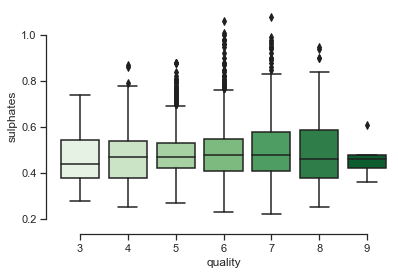

In [59]:
sns.boxplot(x="quality", y="sulphates",data=white_wine,palette="Greens")
sns.despine(offset=10, trim=True)

From graph, sulphates couldn't have any association with white_wine

In summary from above, the attributes that could have associations with quality and will be our feature selection are

- [residual sugar - density]
- alcohol
- density
- volatile acidity
- chloride
- fixed acidity
- citric acid
- free sulfur dioxide
- total sulfur dioxide
- pH

But the attributes that seem don't have any association is only sulphates

# Data Preparation Before Training Model

## Data Transformation for Right-Skewed Data

### Red Wine

List of attributes that we need to transform
```
Free sulfur dioxide
Total sulfur dioxide
Alcohol
Sulphates
```

In [60]:
pred_red_wine=red_wine.copy()
pred_red_wine['free sulfur dioxide'] = np.log(pred_red_wine['free sulfur dioxide'])
pred_red_wine['total sulfur dioxide'] = np.log(pred_red_wine['total sulfur dioxide'])
pred_red_wine['alcohol'] = np.log(pred_red_wine['alcohol'])
pred_red_wine['sulphates'] = np.log(pred_red_wine['sulphates'])

Text(0.5, 1.0, 'New sulphates')

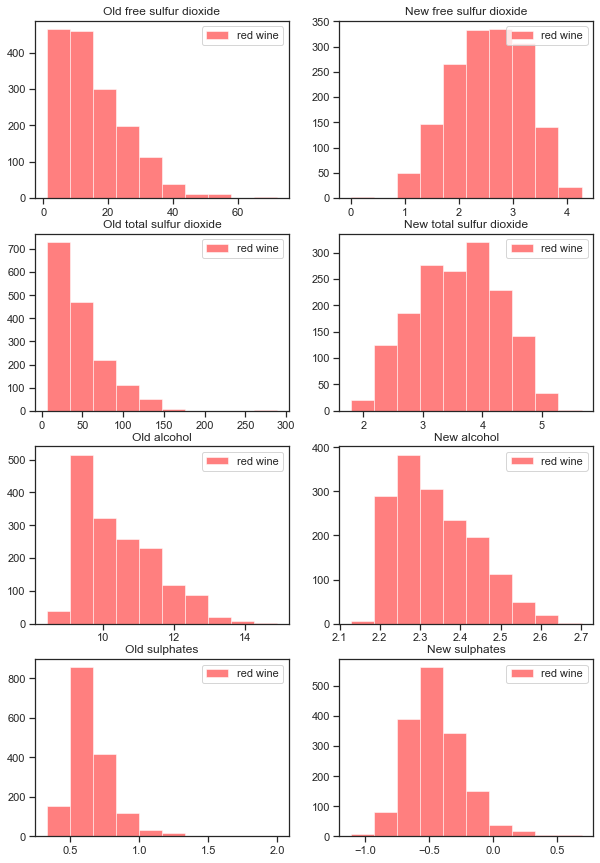

In [61]:
fig, axs = plt.subplots(4, 2,figsize=(10,15))

axs[0,0].hist(red_wine['free sulfur dioxide'], alpha=0.5, label='red wine', color="red")
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Old free sulfur dioxide')

axs[0,1].hist(pred_red_wine['free sulfur dioxide'], alpha=0.5, label='red wine', color="red")
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('New free sulfur dioxide')

axs[1,0].hist(red_wine['total sulfur dioxide'], alpha=0.5, label='red wine', color="red")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Old total sulfur dioxide')

axs[1,1].hist(pred_red_wine['total sulfur dioxide'], alpha=0.5, label='red wine', color="red")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('New total sulfur dioxide')

axs[2,0].hist(red_wine['alcohol'], alpha=0.5, label='red wine', color="red")
axs[2,0].legend(loc='upper right')
axs[2,0].set_title('Old alcohol')

axs[2,1].hist(pred_red_wine['alcohol'], alpha=0.5, label='red wine', color="red")
axs[2,1].legend(loc='upper right')
axs[2,1].set_title('New alcohol')

axs[3,0].hist(red_wine['sulphates'], alpha=0.5, label='red wine', color="red")
axs[3,0].legend(loc='upper right')
axs[3,0].set_title('Old sulphates')

axs[3,1].hist(pred_red_wine['sulphates'], alpha=0.5, label='red wine', color="red")
axs[3,1].legend(loc='upper right')
axs[3,1].set_title('New sulphates')

### White Wine

List of attributes that we need to transform
```
Residual sugar
Alcohol
```

In [62]:
pred_white_wine=white_wine.copy()
pred_white_wine['residual sugar'] = np.log(pred_white_wine['residual sugar'])
pred_white_wine['alcohol'] = np.log(pred_white_wine['alcohol'])

Text(0.5, 1.0, 'New alcohol')

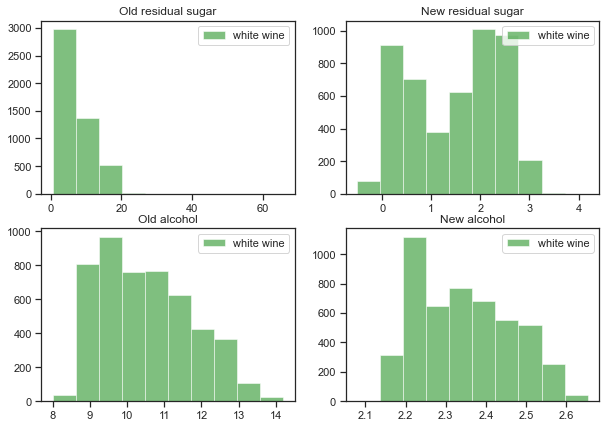

In [63]:
fig, axs = plt.subplots(2, 2,figsize=(10,7))

axs[0,0].hist(white_wine['residual sugar'], alpha=0.5, label='white wine', color="green")
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Old residual sugar')

axs[0,1].hist(pred_white_wine['residual sugar'], alpha=0.5, label='white wine', color="green")
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('New residual sugar')

axs[1,0].hist(white_wine['alcohol'], alpha=0.5, label='white wine', color="green")
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Old alcohol')

axs[1,1].hist(pred_white_wine['alcohol'], alpha=0.5, label='white wine', color="green")
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('New alcohol')

## Feature selection

### Red wine

List of removed feature
```
fixed acidity
pH
residual sugar
```

In [64]:
pred_red_wine = pred_red_wine.drop(columns=[ 'pH', 'residual sugar'])

### White wine

List of removed feature
```
sulphates
```

In [65]:
pred_white_wine = pred_white_wine.drop(columns=['sulphates'])

## Separate Features and Label

### Quality Type (2 outputs)

In [66]:
y_type_red_wine = pred_red_wine['quality_type']
y_type_white_wine = pred_white_wine['quality_type']

### Quality Bin (3 outputs)

In [67]:
y_bin_red_wine = pred_red_wine['quality_3_bin']
y_bin_white_wine = pred_white_wine['quality_3_bin']

### Quality (Scale 3-9) (Experiments)
On started, we have summarize that we are going to predict quality to 2 output classes and 3 output classes.
But we want to know, if we predict scale 3-9, what is the result. This is just an experiment for our group.

In [68]:
y_red_wine = pred_red_wine['quality']
y_white_wine = pred_white_wine['quality']

### Features

In [69]:
x_red_wine = pred_red_wine.drop(columns=['quality_type', 'quality_3_bin','quality'])
x_white_wine = pred_white_wine.drop(columns=['quality_type', 'quality_3_bin','quality'])

# Creating the Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Decision Tree

### Red Wine - Quality Type (2 Outputs)

#### Split Train Test

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_type_red_wine, test_size=0.33, random_state=19)

#### Train model

In [224]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [225]:
y_pred = clf.predict(x_test)

#### Evaluation

In [226]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.55      0.57      0.56        81
not good quality       0.92      0.91      0.92       447

        accuracy                           0.86       528
       macro avg       0.73      0.74      0.74       528
    weighted avg       0.86      0.86      0.86       528



In [227]:
print(confusion_matrix(y_test, y_pred))

[[ 46  35]
 [ 38 409]]


### White Wine - Quality Type (2 Outputs)

#### Split Train Test

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_type_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [229]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [230]:
y_pred = clf.predict(x_test)

#### Evaluation

In [231]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.58      0.60      0.59       367
not good quality       0.88      0.87      0.88      1250

        accuracy                           0.81      1617
       macro avg       0.73      0.74      0.73      1617
    weighted avg       0.81      0.81      0.81      1617



In [232]:
print(confusion_matrix(y_test, y_pred))

[[ 222  145]
 [ 163 1087]]


==================================================================================================================

### Red Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_bin_red_wine, test_size=0.33, random_state=19)

#### Train model

In [234]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [235]:
y_pred = clf.predict(x_test)

#### Evaluation

In [236]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.16      0.19      0.17        21
         5-6       0.88      0.87      0.87       426
         7-9       0.54      0.56      0.55        81

    accuracy                           0.79       528
   macro avg       0.53      0.54      0.53       528
weighted avg       0.80      0.79      0.79       528



In [237]:
print(confusion_matrix(y_test, y_pred))

[[  4  15   2]
 [ 21 369  36]
 [  0  36  45]]


### White Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_bin_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [239]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [240]:
y_pred = clf.predict(x_test)

#### Evaluation

In [241]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.26      0.32      0.29        50
         5-6       0.86      0.83      0.84      1200
         7-9       0.57      0.60      0.58       367

    accuracy                           0.76      1617
   macro avg       0.56      0.58      0.57      1617
weighted avg       0.77      0.76      0.77      1617



In [242]:
print(confusion_matrix(y_test, y_pred))

[[ 16  31   3]
 [ 37 997 166]
 [  8 138 221]]


==================================================================================================================

### Red Wine - Quality (3-9)

#### Split Train Test

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_red_wine, test_size=0.33, random_state=19)

#### Train model

In [92]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [93]:
y_pred = clf.predict(x_test)

#### Evaluation

In [94]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.06      0.08        17
           5       0.67      0.68      0.67       220
           6       0.56      0.60      0.58       206
           7       0.55      0.49      0.52        73
           8       0.11      0.12      0.12         8

    accuracy                           0.59       528
   macro avg       0.34      0.33      0.33       528
weighted avg       0.58      0.59      0.58       528



In [95]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   3   1   0   0]
 [  0   1   9   5   2   0]
 [  1   5 150  59   4   1]
 [  1   2  54 123  21   5]
 [  0   0   8  27  36   2]
 [  0   0   1   3   3   1]]


### White Wine - Quality (3-9)

#### Split Train Test

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [97]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [98]:
y_pred = clf.predict(x_test)

#### Evaluation

In [99]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.25      0.23        44
           5       0.58      0.60      0.59       446
           6       0.63      0.62      0.62       754
           7       0.55      0.52      0.53       302
           8       0.41      0.43      0.42        65
           9       0.00      0.00      0.00         0

    accuracy                           0.57      1617
   macro avg       0.34      0.34      0.34      1617
weighted avg       0.58      0.57      0.58      1617



C:\Users\MrTK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
confusion_matrix(y_test, y_pred)

array([[  0,   2,   4,   0,   0,   0,   0],
       [  1,  11,  13,  16,   2,   1,   0],
       [  3,  22, 267, 140,  13,   1,   0],
       [  3,  14, 146, 465, 104,  21,   1],
       [  1,   3,  26,  97, 156,  17,   2],
       [  0,   1,   4,  20,  11,  28,   1],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

==================================================================================================================

## Random Forest

### Red Wine - Quality Type (2 Outputs)

#### Split Train Test

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_type_red_wine, test_size=0.33, random_state=19)

#### Train model

In [244]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [245]:
y_pred = clf.predict(x_test)

#### Evaluation

In [246]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.82      0.46      0.59        81
not good quality       0.91      0.98      0.94       447

        accuracy                           0.90       528
       macro avg       0.87      0.72      0.77       528
    weighted avg       0.90      0.90      0.89       528



In [247]:
print(confusion_matrix(y_test, y_pred))

[[ 37  44]
 [  8 439]]


### White Wine - Quality Type (2 Outputs)

#### Split Train Test

In [248]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_type_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [249]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [250]:
y_pred = clf.predict(x_test)

#### Evaluation

In [251]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.78      0.59      0.67       367
not good quality       0.89      0.95      0.92      1250

        accuracy                           0.87      1617
       macro avg       0.84      0.77      0.80      1617
    weighted avg       0.86      0.87      0.86      1617



In [252]:
print(confusion_matrix(y_test, y_pred))

[[ 217  150]
 [  60 1190]]


==================================================================================================================

### Red Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_bin_red_wine, test_size=0.33, random_state=19)

#### Train model

In [254]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [255]:
y_pred = clf.predict(x_test)

#### Evaluation

In [256]:
print(classification_report(y_true=y_test, y_pred=y_pred,zero_division=0))

              precision    recall  f1-score   support

         3-4       1.00      0.05      0.09        21
         5-6       0.87      0.98      0.92       426
         7-9       0.84      0.47      0.60        81

    accuracy                           0.87       528
   macro avg       0.90      0.50      0.54       528
weighted avg       0.87      0.87      0.84       528



In [257]:
print(confusion_matrix(y_test, y_pred))

[[  1  20   0]
 [  0 419   7]
 [  0  43  38]]


### White Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [258]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_bin_white_wine, test_size=0.33, random_state=42)

#### Train Model

In [259]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [260]:
y_pred = clf.predict(x_test)

#### Evaluation

In [261]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.53      0.15      0.24        53
         5-6       0.86      0.96      0.91      1203
         7-9       0.82      0.60      0.69       361

    accuracy                           0.85      1617
   macro avg       0.74      0.57      0.61      1617
weighted avg       0.84      0.85      0.84      1617



In [262]:
print(confusion_matrix(y_test, y_pred))

[[   8   44    1]
 [   6 1150   47]
 [   1  143  217]]


==================================================================================================================

### Red Wine - Quality (3-9)

#### Split Train Test

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_red_wine, test_size=0.33, random_state=19)

#### Train model

In [122]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [123]:
y_pred = clf.predict(x_test)

#### Evaluation

In [124]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.75      0.75      0.75       220
           6       0.61      0.76      0.68       206
           7       0.76      0.51      0.61        73
           8       1.00      0.12      0.22         8

    accuracy                           0.68       528
   macro avg       0.52      0.36      0.38       528
weighted avg       0.67      0.68      0.67       528



C:\Users\MrTK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   4   0   0   0]
 [  0   0   9   8   0   0]
 [  0   1 166  53   0   0]
 [  0   0  40 157   9   0]
 [  0   0   2  34  37   0]
 [  0   0   0   4   3   1]]


### White Wine - Quality (3-9)

#### Split Train Test

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [127]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [128]:
y_pred = clf.predict(x_test)

#### Evaluation

In [129]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.23      0.34        44
           5       0.67      0.70      0.68       446
           6       0.65      0.75      0.70       754
           7       0.66      0.51      0.58       302
           8       0.93      0.42      0.57        65

    accuracy                           0.66      1617
   macro avg       0.60      0.43      0.48      1617
weighted avg       0.67      0.66      0.65      1617



In [130]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   3   3   0   0]
 [  1  10  22  10   1   0]
 [  0   3 310 128   5   0]
 [  0   1 125 567  60   1]
 [  0   0   3 143 155   1]
 [  0   0   1  22  15  27]]


# Experiment Model

## Decision Tree

In [131]:
x_red_wine = red_wine.drop(columns=['quality', 'quality_type', 'quality_3_bin'])
x_white_wine = white_wine.drop(columns=['quality', 'quality_type', 'quality_3_bin'])

### Red Wine - Quality Type (2 Outputs)

#### Split Train Test

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_type_red_wine, test_size=0.33, random_state=19)

#### Train model

In [133]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [134]:
y_pred = clf.predict(x_test)

#### Evaluation

In [135]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.56      0.59      0.58        81
not good quality       0.93      0.92      0.92       447

        accuracy                           0.87       528
       macro avg       0.75      0.75      0.75       528
    weighted avg       0.87      0.87      0.87       528



In [136]:
print(confusion_matrix(y_test, y_pred))

[[ 48  33]
 [ 37 410]]


### White Wine - Quality Type (2 Outputs)

#### Split Train Test

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_type_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [138]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [139]:
y_pred = clf.predict(x_test)

#### Evaluation

In [140]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.59      0.62      0.60       367
not good quality       0.89      0.87      0.88      1250

        accuracy                           0.81      1617
       macro avg       0.74      0.75      0.74      1617
    weighted avg       0.82      0.81      0.82      1617



In [141]:
print(confusion_matrix(y_test, y_pred))

[[ 228  139]
 [ 161 1089]]


==================================================================================================================

### Red Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_bin_red_wine, test_size=0.33, random_state=19)

#### Train model

In [143]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [144]:
y_pred = clf.predict(x_test)

#### Evaluation

In [145]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.19      0.24      0.21        21
         5-6       0.89      0.86      0.87       426
         7-9       0.55      0.59      0.57        81

    accuracy                           0.79       528
   macro avg       0.54      0.56      0.55       528
weighted avg       0.81      0.79      0.80       528



In [146]:
print(confusion_matrix(y_test, y_pred))

[[  5  14   2]
 [ 22 366  38]
 [  0  33  48]]


### White Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_bin_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [148]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [149]:
y_pred = clf.predict(x_test)

#### Evaluation

In [150]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.22      0.28      0.24        50
         5-6       0.86      0.83      0.84      1200
         7-9       0.58      0.60      0.59       367

    accuracy                           0.76      1617
   macro avg       0.55      0.57      0.56      1617
weighted avg       0.77      0.76      0.77      1617



In [151]:
print(confusion_matrix(y_test, y_pred))

[[  14   33    3]
 [  42 1001  157]
 [   9  136  222]]


==================================================================================================================

### Red Wine - Quality (3-9)

#### Split Train Test

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_red_wine, test_size=0.33, random_state=19)

#### Train model

In [153]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [154]:
y_pred = clf.predict(x_test)

#### Evaluation

In [155]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.06      0.06      0.06        17
           5       0.67      0.66      0.66       220
           6       0.58      0.58      0.58       206
           7       0.51      0.53      0.52        73
           8       0.25      0.25      0.25         8

    accuracy                           0.58       528
   macro avg       0.35      0.35      0.35       528
weighted avg       0.58      0.58      0.58       528



In [156]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   3   1   0   0]
 [  0   1  11   3   2   0]
 [  2   9 145  54   9   1]
 [  2   7  50 120  23   4]
 [  0   0   8  25  39   1]
 [  0   0   0   3   3   2]]


### White Wine - Quality (3-9)

#### Split Train Test

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [158]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

#### Predict

In [159]:
y_pred = clf.predict(x_test)

#### Evaluation

In [160]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.25      0.30      0.27        44
           5       0.58      0.60      0.59       446
           6       0.64      0.62      0.63       754
           7       0.55      0.56      0.55       302
           8       0.51      0.46      0.48        65
           9       0.00      0.00      0.00         0

    accuracy                           0.58      1617
   macro avg       0.36      0.36      0.36      1617
weighted avg       0.59      0.58      0.59      1617



C:\Users\MrTK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
print(confusion_matrix(y_test, y_pred))

[[  0   1   4   1   0   0   0]
 [  1  13  12  16   2   0   0]
 [  4  25 268 135  12   2   0]
 [  2  10 151 466 104  21   0]
 [  0   2  28  97 168   6   1]
 [  0   1   3  12  19  30   0]
 [  0   0   0   0   0   0   0]]


==================================================================================================================

## Random Forest

### Red Wine - Quality Type (2 Outputs)

#### Split Train Test

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_type_red_wine, test_size=0.33, random_state=19)

#### Train model

In [163]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [164]:
y_pred = clf.predict(x_test)

#### Evaluation

In [165]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.82      0.46      0.59        81
not good quality       0.91      0.98      0.94       447

        accuracy                           0.90       528
       macro avg       0.87      0.72      0.77       528
    weighted avg       0.90      0.90      0.89       528



In [166]:
print(confusion_matrix(y_test, y_pred))

[[ 37  44]
 [  8 439]]


### White Wine - Quality Type (2 Outputs)

#### Split Train Test

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_type_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [168]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [169]:
y_pred = clf.predict(x_test)

#### Evaluation

In [170]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.78      0.59      0.67       367
not good quality       0.89      0.95      0.92      1250

        accuracy                           0.87      1617
       macro avg       0.84      0.77      0.80      1617
    weighted avg       0.86      0.87      0.86      1617



In [171]:
print(confusion_matrix(y_test, y_pred))

[[ 217  150]
 [  60 1190]]


==================================================================================================================

### Red Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_bin_red_wine, test_size=0.33, random_state=19)

#### Train model

In [173]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [174]:
y_pred = clf.predict(x_test)

#### Evaluation

In [175]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       1.00      0.05      0.09        21
         5-6       0.87      0.98      0.92       426
         7-9       0.84      0.47      0.60        81

    accuracy                           0.87       528
   macro avg       0.90      0.50      0.54       528
weighted avg       0.87      0.87      0.84       528



In [176]:
print(confusion_matrix(y_test, y_pred))

[[  1  20   0]
 [  0 419   7]
 [  0  43  38]]


### White Wine - Quality Bin (3 Outputs)

#### Split Train Test

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_bin_white_wine, test_size=0.33, random_state=42)

#### Train Model

In [178]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [179]:
y_pred = clf.predict(x_test)

#### Evaluation

In [180]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.53      0.15      0.24        53
         5-6       0.86      0.96      0.91      1203
         7-9       0.82      0.60      0.69       361

    accuracy                           0.85      1617
   macro avg       0.74      0.57      0.61      1617
weighted avg       0.84      0.85      0.84      1617



In [181]:
print(confusion_matrix(y_test, y_pred))

[[   8   44    1]
 [   6 1150   47]
 [   1  143  217]]


==================================================================================================================

### Red Wine - Quality (3-9)

#### Split Train Test

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x_red_wine, y_red_wine, test_size=0.33, random_state=19)

#### Train model

In [183]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [184]:
y_pred = clf.predict(x_test)

#### Evaluation

In [185]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.75      0.78      0.77       220
           6       0.63      0.77      0.69       206
           7       0.80      0.55      0.65        73
           8       1.00      0.12      0.22         8

    accuracy                           0.70       528
   macro avg       0.53      0.37      0.39       528
weighted avg       0.69      0.70      0.68       528



C:\Users\MrTK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   4   0   0   0]
 [  0   0  10   7   0   0]
 [  0   0 171  49   0   0]
 [  0   0  41 158   7   0]
 [  0   0   1  32  40   0]
 [  0   0   0   4   3   1]]


### White Wine - Quality (3-9)

#### Split Train Test

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x_white_wine, y_white_wine, test_size=0.33, random_state=19)

#### Train Model

In [188]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

#### Predict

In [189]:
y_pred = clf.predict(x_test)

#### Evaluation

In [190]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.79      0.25      0.38        44
           5       0.68      0.72      0.70       446
           6       0.66      0.75      0.70       754
           7       0.67      0.52      0.59       302
           8       0.96      0.42      0.58        65

    accuracy                           0.67      1617
   macro avg       0.63      0.44      0.49      1617
weighted avg       0.68      0.67      0.66      1617



In [191]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   3   3   0   0]
 [  1  11  20  11   1   0]
 [  0   2 322 119   3   0]
 [  0   1 125 567  60   1]
 [  0   0   3 141 158   0]
 [  0   0   1  23  14  27]]


=====================================================================================================================

## Wine - Predict together

### Decision Tree

#### Wine - Quality Type (2 Outputs)

In [192]:
y_type_wine = wine['quality_type']
y_bin_wine = wine['quality_3_bin']
y_wine = wine['quality']
x_wine = wine.drop(columns=['quality_type', 'quality_3_bin', 'quality'])
x_wine['type'] = pd.get_dummies(x_wine['type'])

##### Split Train Test

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_type_wine, test_size=0.33, random_state=19)

##### Train model

In [194]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

##### Predict

In [195]:
y_pred = clf.predict(x_test)

##### Evaluation

In [196]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.61      0.58      0.59       440
not good quality       0.89      0.90      0.90      1705

        accuracy                           0.84      2145
       macro avg       0.75      0.74      0.75      2145
    weighted avg       0.83      0.84      0.84      2145



In [197]:
print(confusion_matrix(y_test, y_pred))

[[ 255  185]
 [ 164 1541]]


#### Wine - Quality Bin (3 Outputs)

##### Split Train Test

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_bin_wine, test_size=0.33, random_state=19)

##### Train model

In [199]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

##### Predict

In [200]:
y_pred = clf.predict(x_test)

##### Evaluation

In [201]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.22      0.18      0.20        71
         5-6       0.86      0.86      0.86      1634
         7-9       0.57      0.58      0.58       440

    accuracy                           0.78      2145
   macro avg       0.55      0.54      0.55      2145
weighted avg       0.78      0.78      0.78      2145



In [202]:
print(confusion_matrix(y_test, y_pred))

[[  13   49    9]
 [  41 1412  181]
 [   6  178  256]]


#### Red Wine - Quality (3-9)

##### Split Train Test

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.33, random_state=19)

##### Train model

In [204]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

##### Predict

In [205]:
y_pred = clf.predict(x_test)

##### Evaluation

In [206]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.21      0.25      0.23        57
           5       0.66      0.65      0.65       709
           6       0.61      0.63      0.62       925
           7       0.55      0.52      0.53       374
           8       0.46      0.48      0.47        66
           9       0.00      0.00      0.00         0

    accuracy                           0.60      2145
   macro avg       0.36      0.36      0.36      2145
weighted avg       0.60      0.60      0.60      2145



C:\Users\MrTK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
print(confusion_matrix(y_test, y_pred))

[[  0   2   4   7   1   0   0]
 [  0  14  21  20   0   2   0]
 [  1  20 460 196  26   6   0]
 [  1  29 176 585 117  16   1]
 [  0   1  30 135 194  13   1]
 [  0   0   8  11  14  32   1]
 [  0   0   0   0   0   0   0]]


### Random Forest

#### Wine - Quality Type (2 Outputs)

##### Split Train Test

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_type_wine, test_size=0.33, random_state=19)

##### Train model

In [209]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

##### Predict

In [210]:
y_pred = clf.predict(x_test)

##### Evaluation

In [211]:
print(classification_report(y_true=y_test, y_pred=y_pred))

                  precision    recall  f1-score   support

    good quality       0.78      0.56      0.65       440
not good quality       0.89      0.96      0.93      1705

        accuracy                           0.88      2145
       macro avg       0.84      0.76      0.79      2145
    weighted avg       0.87      0.88      0.87      2145



In [212]:
print(confusion_matrix(y_test, y_pred))

[[ 247  193]
 [  71 1634]]


#### Wine - Quality Type (2 Outputs)

##### Split Train Test

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_bin_wine, test_size=0.33, random_state=19)

##### Train Model

In [214]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

##### Predict

In [215]:
y_pred = clf.predict(x_test)

##### Evaluation

In [216]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         3-4       0.67      0.06      0.10        71
         5-6       0.86      0.95      0.90      1634
         7-9       0.77      0.57      0.65       440

    accuracy                           0.84      2145
   macro avg       0.77      0.53      0.55      2145
weighted avg       0.83      0.84      0.83      2145



In [217]:
print(confusion_matrix(y_test, y_pred))

[[   4   67    0]
 [   2 1559   73]
 [   0  191  249]]


#### Wine - Quality (3-9)

##### Split Train Test

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.33, random_state=19)

##### Train model

In [219]:
clf = RandomForestClassifier(criterion="entropy",random_state=19)
clf = clf.fit(x_train, y_train)

##### Predict

In [220]:
y_pred = clf.predict(x_test)

##### Evaluation

In [221]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.62      0.14      0.23        57
           5       0.73      0.72      0.72       709
           6       0.63      0.77      0.69       925
           7       0.68      0.51      0.58       374
           8       0.90      0.39      0.55        66

    accuracy                           0.67      2145
   macro avg       0.59      0.42      0.46      2145
weighted avg       0.68      0.67      0.66      2145



C:\Users\MrTK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   9   5   0   0]
 [  0   8  29  20   0   0]
 [  0   2 511 190   6   0]
 [  0   3 144 710  67   1]
 [  0   0   8 173 191   2]
 [  0   0   0  24  16  26]]


References:
- [Wine taste](https://www.wineman.asia/red-white-wine/)